# Load Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## ignore warnings
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


## About Dataset

**Obesity**

Obesity, which causes physical and mental problems, is a global health problem with serious consequences. The prevalence of obesity is increasing steadily, and therefore, new research is needed that examines the influencing factors of obesity and how to predict the occurrence of the condition according to these factors.

" https://www.semanticscholar.org/paper/Estimation-of-Obesity-Levels-with-a-Trained-Neural-Ya%C4%9F%C4%B1n-G%C3%BCl%C3%BC/2c1eab51db154493d225c8b86ba885bbaf147a2c "

**Dataset Information**

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of **Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III**. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

The **17 attributes** are : 

**Gender**: Feature, Categorical, "Gender"

**Age** : Feature, Continuous, "Age"

**Height**: Feature, Continuous

**Weight**: Feature Continuous

**family_history_with_overweight**: Feature, Binary, " Has a family member suffered or suffers from overweight? "

**FAVC** : Feature, Binary, " Do you eat high caloric food frequently? "

**FCVC** : Feature, Integer, " Do you usually eat vegetables in your meals? "

**NCP** : Feature, Continuous, " How many main meals do you have daily? "

**CAEC** : Feature, Categorical, " Do you eat any food between meals? "

**SMOKE** : Feature, Binary, " Do you smoke? "

**CH2O**: Feature, Continuous, " How much water do you drink daily? "

**SCC**: Feature, Binary, " Do you monitor the calories you eat daily? "

**FAF**: Feature, Continuous, " How often do you have physical activity? "

**TUE** : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

**CALC** : Feature, Categorical, " How often do you drink alcohol? "

**MTRANS** : Feature, Categorical, " Which transportation do you usually use? "

and the **TARGET** : 

**NObeyesdad** : Target, Categorical, "Obesity level"

# I. Load Data

In [2]:
obesity_data = pd.read_csv("Data/ObesityDataSet.csv")
obesity_data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Some informations about data

In [3]:
## Shape of data
obesity_data.shape

(2111, 17)

In [4]:
## columns of data
obesity_data.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
## informations about each column
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [6]:
## Basics statistics : summarize dataset with descriptives statistics
obesity_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# II. Data Wraling (data cleaning, transformation, etc.)

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


<Axes: >

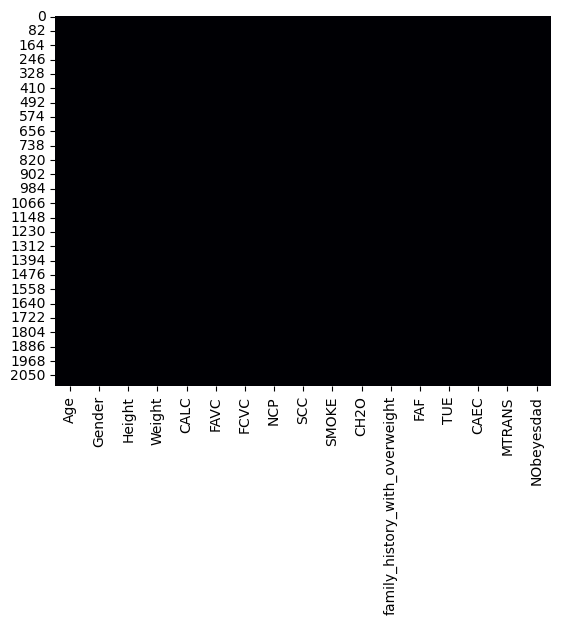

In [7]:
## Missing Values ?
missing = obesity_data.isna().sum()
print(missing)

sns.heatmap(obesity_data.isnull(),cmap = 'magma', cbar = False)

This data do not contain missing values: as we can see each column has zero NA values and/or in heatmap.

# III. Exploration Data Analysis (EDA)

### TARGET : Obesity Level

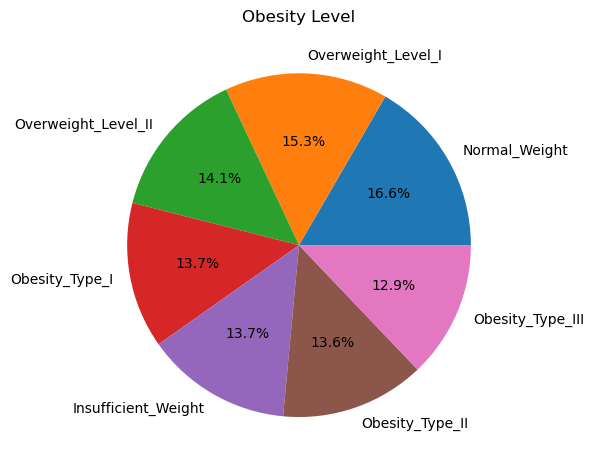

In [8]:
## TARGET : Obesity Level
targets = obesity_data.loc[:, "NObeyesdad"].unique()
numberTargerts = obesity_data.loc[:, "NObeyesdad"].value_counts().values


## Plot
fig, ax = plt.subplots()

labels = targets
pie_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:red', 'tab:blue', 'tab:red']

ax.pie(numberTargerts, labels = labels, autopct = '%1.1f%%') 
ax.set_title('Obesity Level')


plt.tight_layout()
plt.show()

### Gender

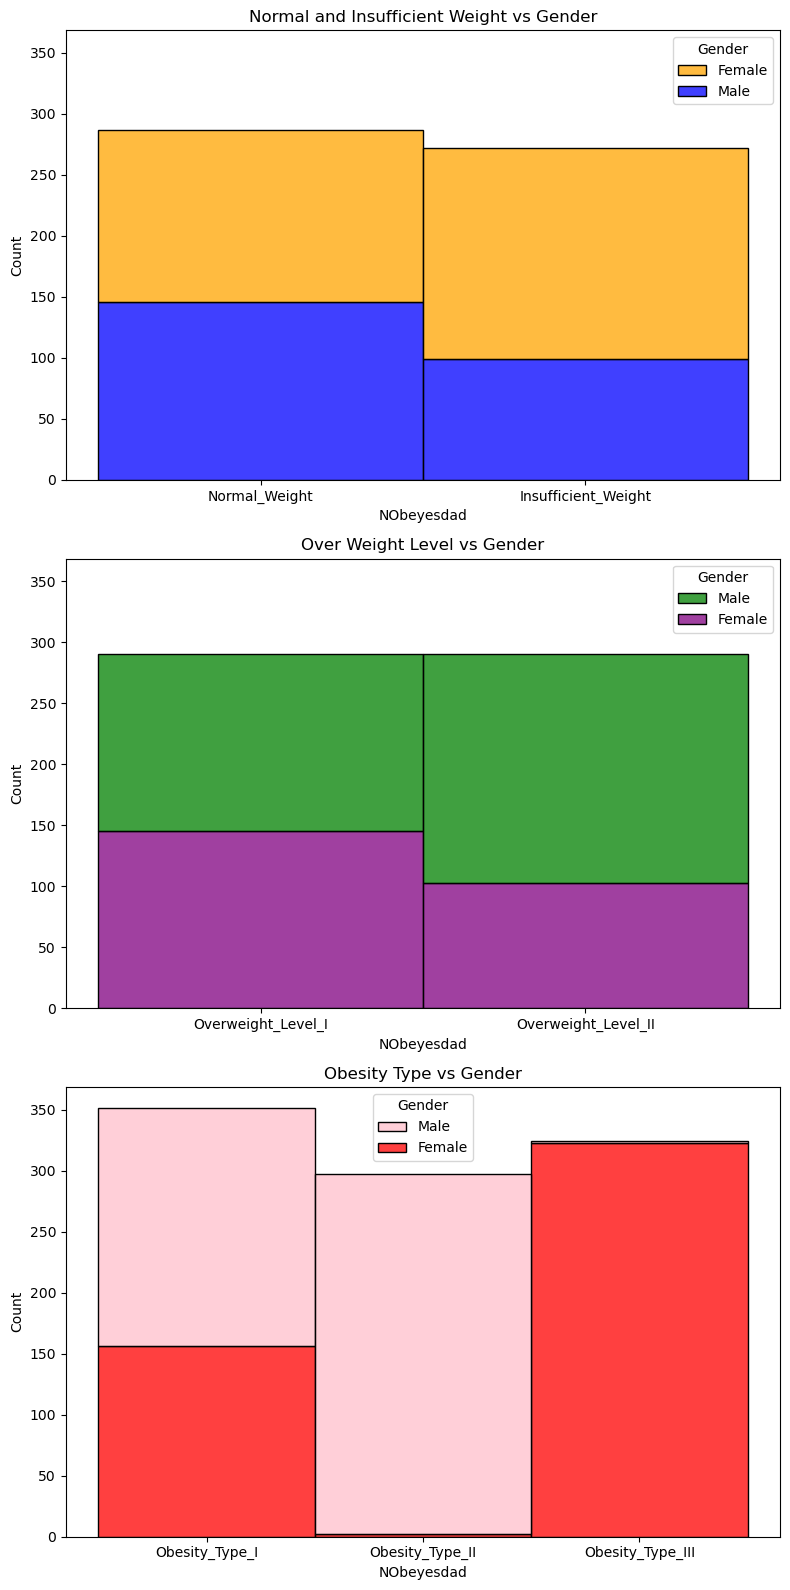

In [9]:
## Gender of candidats by groups of obesity levels
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])



## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

sns.histplot(data=normalInsuff, x='NObeyesdad', hue='Gender',palette= ["orange","blue"], ax=axes[0], multiple='stack')
axes[0].set_title('Normal and Insufficient Weight vs Gender')

sns.histplot(data=overWeightLevel, x='NObeyesdad', hue='Gender',palette= ["green","purple"], ax=axes[1], multiple='stack')
axes[1].set_title('Over Weight Level vs Gender')

sns.histplot(data=obesityType, x='NObeyesdad', hue='Gender',palette= ["pink","red", "yellow"], ax=axes[2], multiple='stack')
axes[2].set_title('Obesity Type vs Gender')



plt.tight_layout()
plt.show()


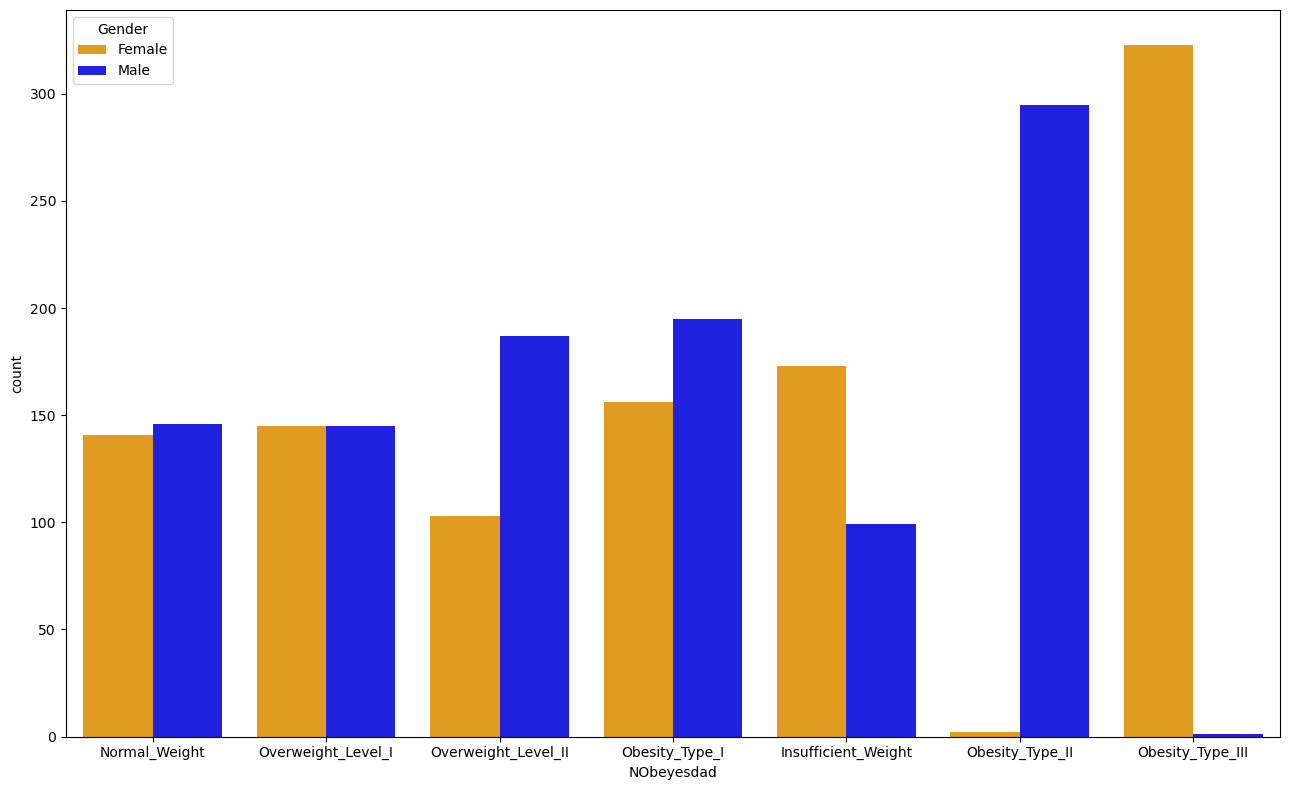

In [10]:
## Gender of candidats by groups of obesity levels

## Plots
figure, axes = plt.subplots(figsize=(13,8))
figure = sns.countplot(data = obesity_data, x="NObeyesdad", hue="Gender", palette= ["orange","blue"])


plt.tight_layout()
plt.show()

#### We have female and male candidats in each group but in the obesity_Type_III group we have in majority female candidates and in the obesity_Type_II group we have in majority male candidates.

### CALC

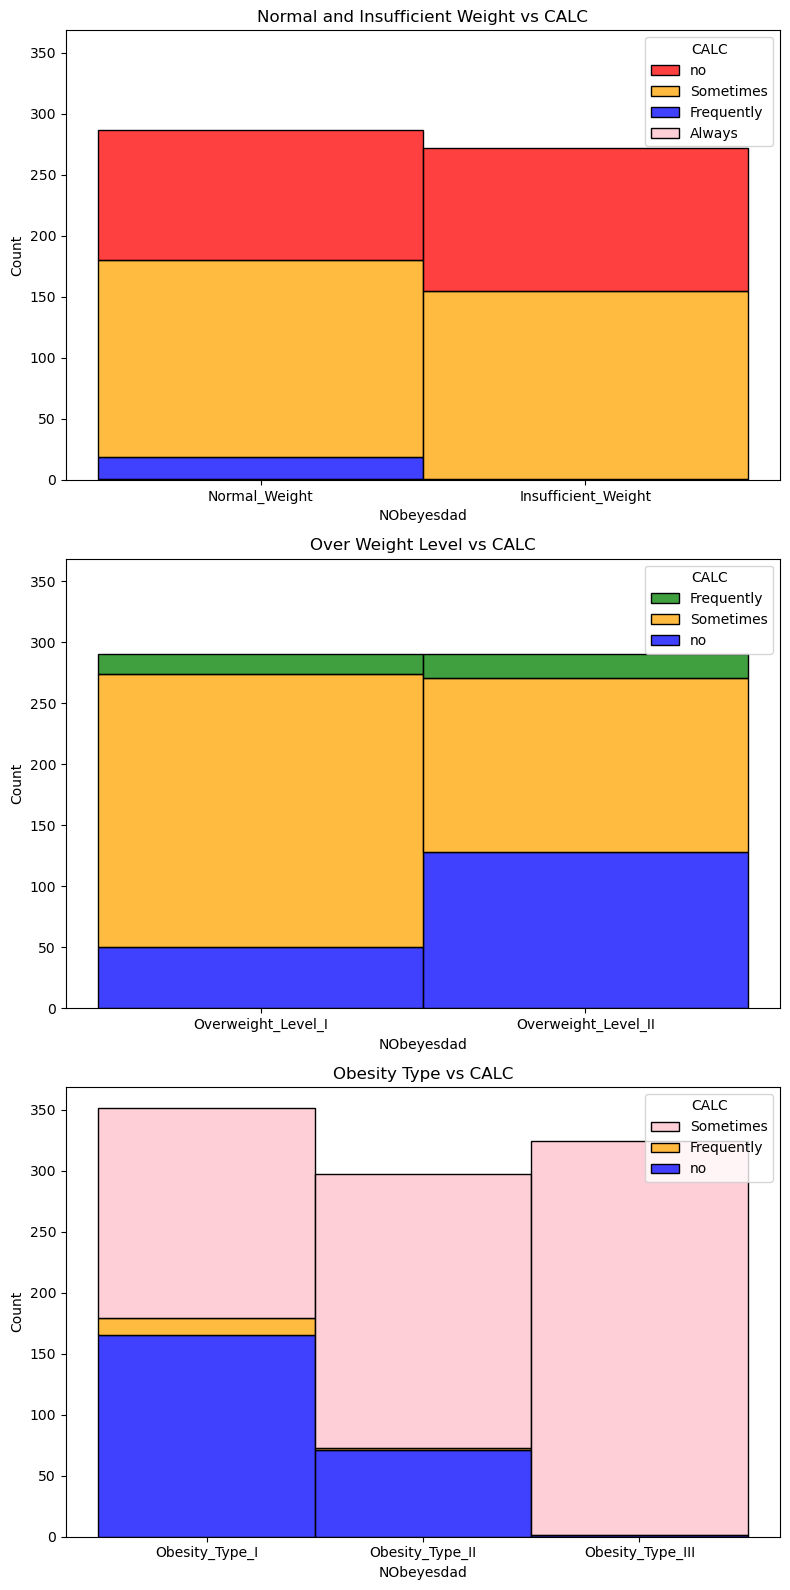

In [11]:
## CALC : How often candidats drink alcohol by groups of obesity levels ?
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])


## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

sns.histplot(data=normalInsuff, x='NObeyesdad', hue='CALC',palette= ["red","orange","blue", "pink"], ax=axes[0], multiple='stack')
axes[0].set_title('Normal and Insufficient Weight vs CALC')

sns.histplot(data=overWeightLevel, x='NObeyesdad', hue='CALC',palette= ["green","orange","blue", "pink"], ax=axes[1], multiple='stack')
axes[1].set_title('Over Weight Level vs CALC')

sns.histplot(data=obesityType, x='NObeyesdad', hue='CALC',palette= ["pink","orange","blue","red"], ax=axes[2], multiple='stack')
axes[2].set_title('Obesity Type vs CALC')



plt.tight_layout()
plt.show()


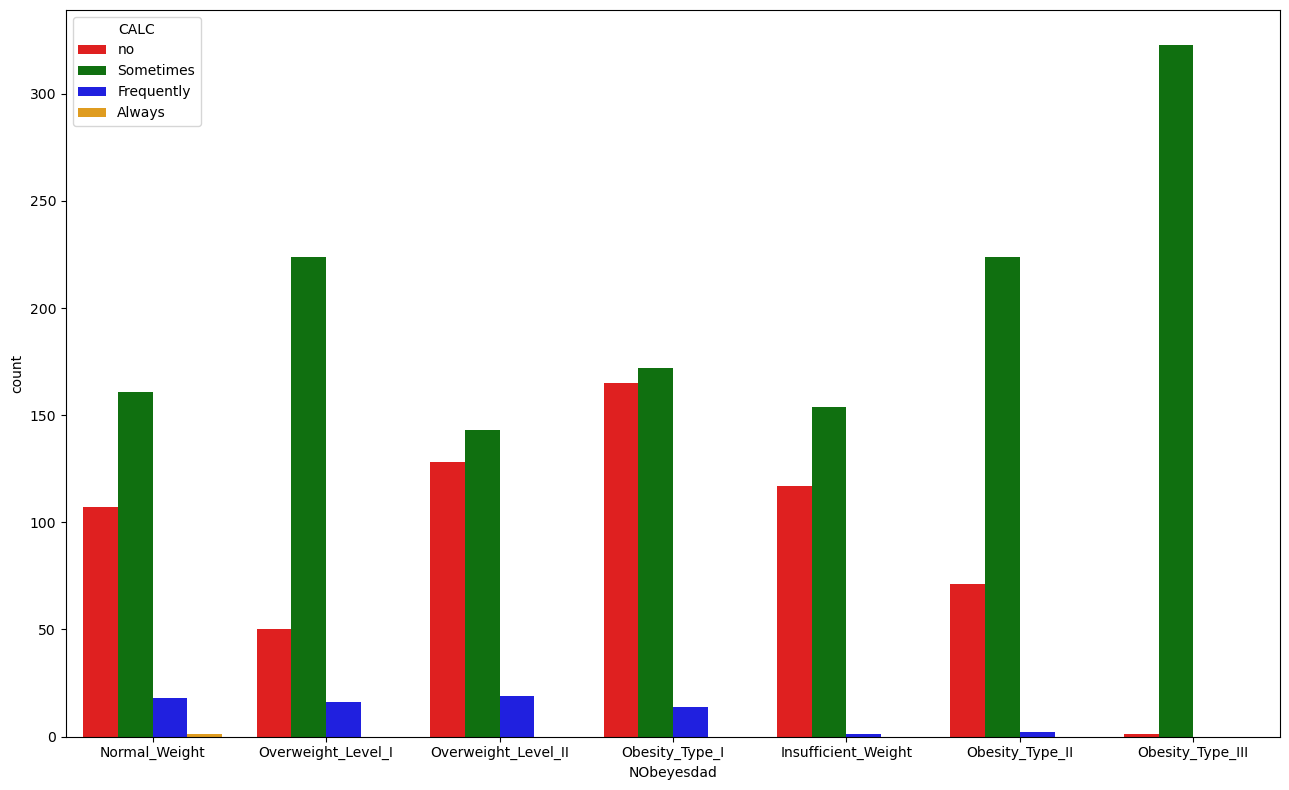

In [12]:
## CALC : How often candidats drink alcohol by groups of obesity levels ?

## Plots
figure, axes = plt.subplots(figsize=(13,8))
figure = sns.countplot(data = obesity_data, x="NObeyesdad", hue="CALC", palette= ["red","green","blue", "orange"])

plt.tight_layout()
plt.show()

#### We can see that candidats of all groups drink alcohol sometimes.

### FAVC

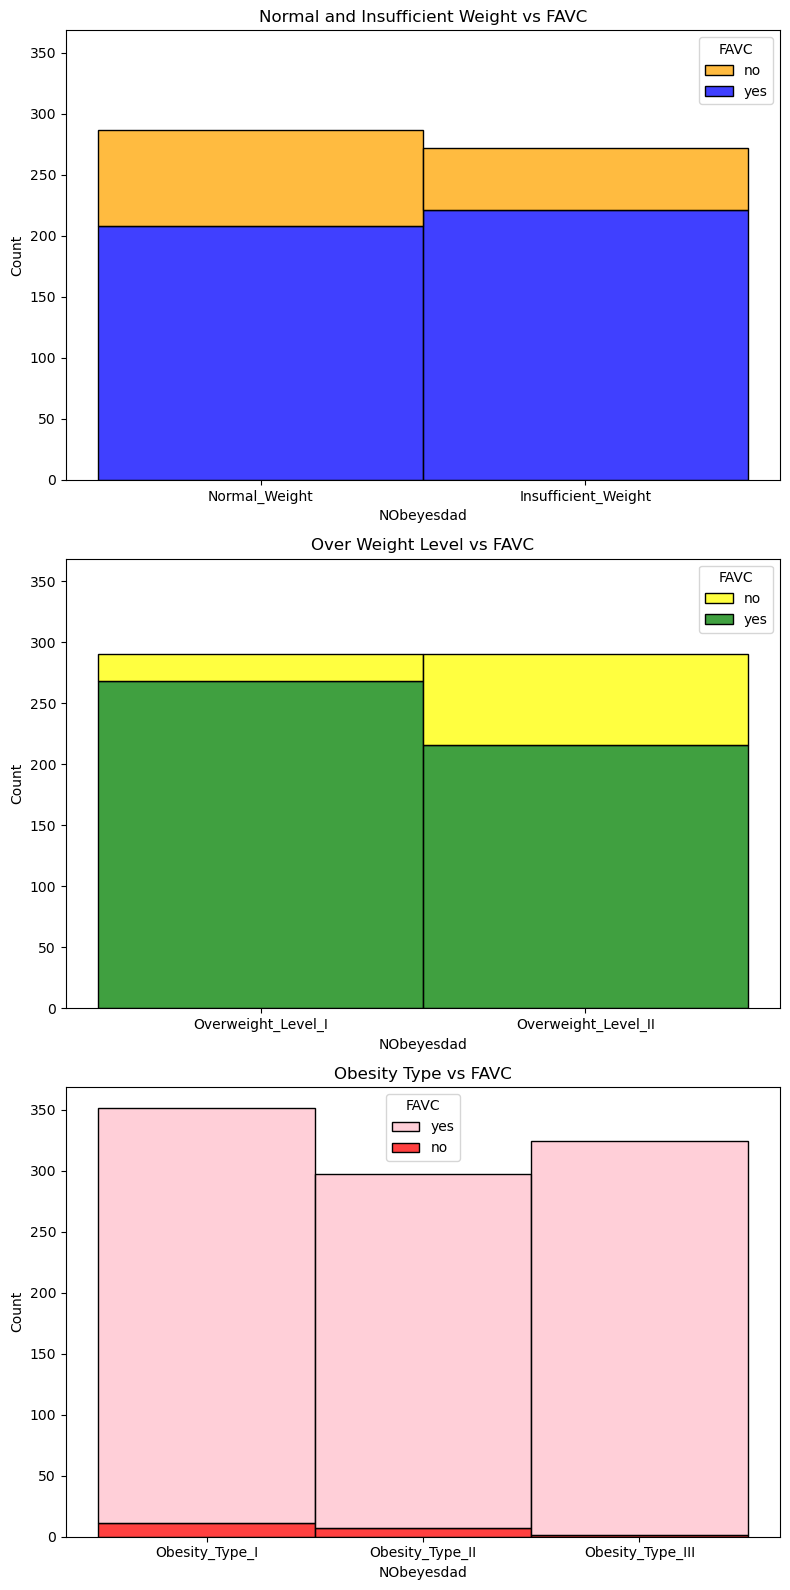

In [13]:
## FAVC : candidats eat high caloric food frequently?
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])



## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

sns.histplot(data=normalInsuff, x='NObeyesdad', hue='FAVC',palette= ["orange","blue"], ax=axes[0], multiple='stack')
axes[0].set_title('Normal and Insufficient Weight vs FAVC')

sns.histplot(data=overWeightLevel, x='NObeyesdad', hue='FAVC',palette= ["yellow","green"], ax=axes[1], multiple='stack')
axes[1].set_title('Over Weight Level vs FAVC')

sns.histplot(data=obesityType, x='NObeyesdad', hue='FAVC',palette= ["pink","red"], ax=axes[2], multiple='stack')
axes[2].set_title('Obesity Type vs FAVC')




plt.tight_layout()
plt.show()


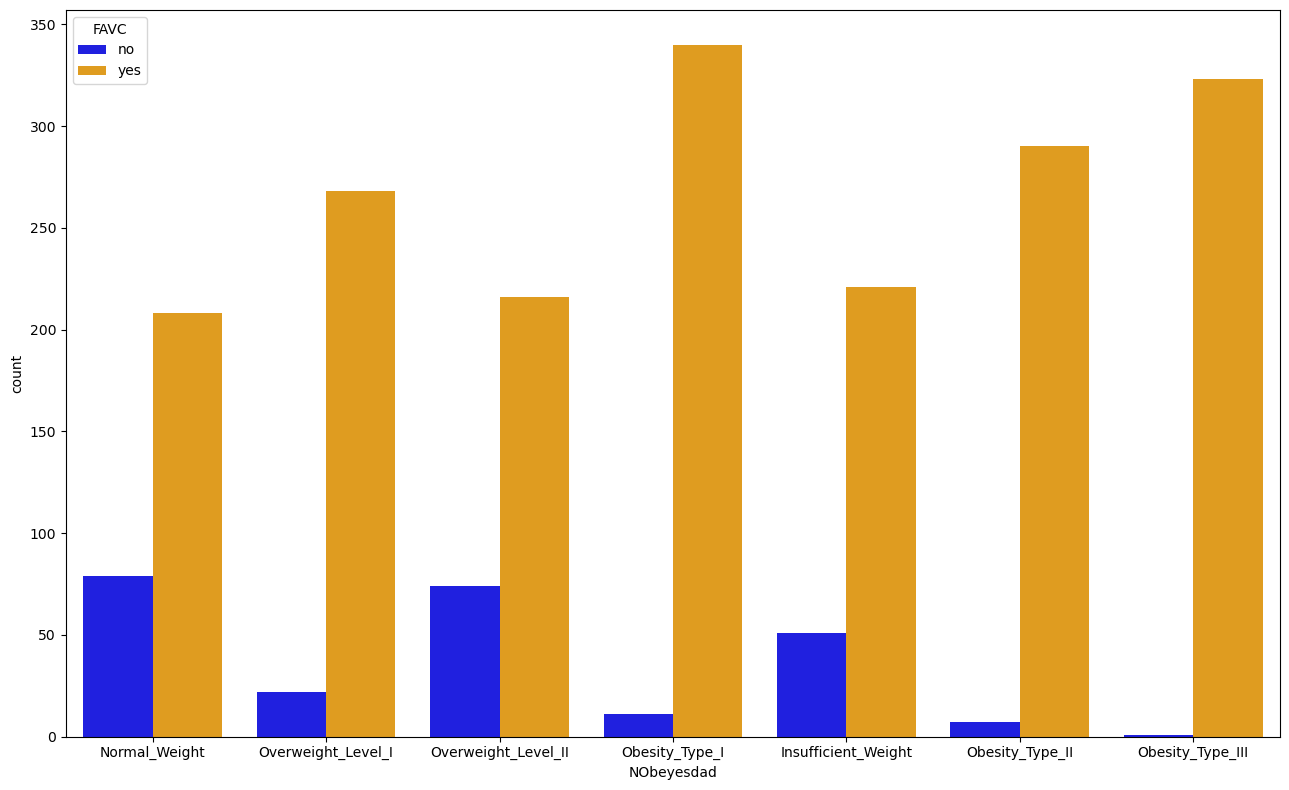

In [14]:
## FAVC : candidats eat high caloric food frequently?

## Plots
figure, axes = plt.subplots(figsize=(13,8))
figure = sns.countplot(data = obesity_data, x="NObeyesdad", hue="FAVC", palette= ["blue", "orange"])

plt.tight_layout()
plt.show()


#### The majority of candidats eat high caloric food frequently in each group.

### SCC

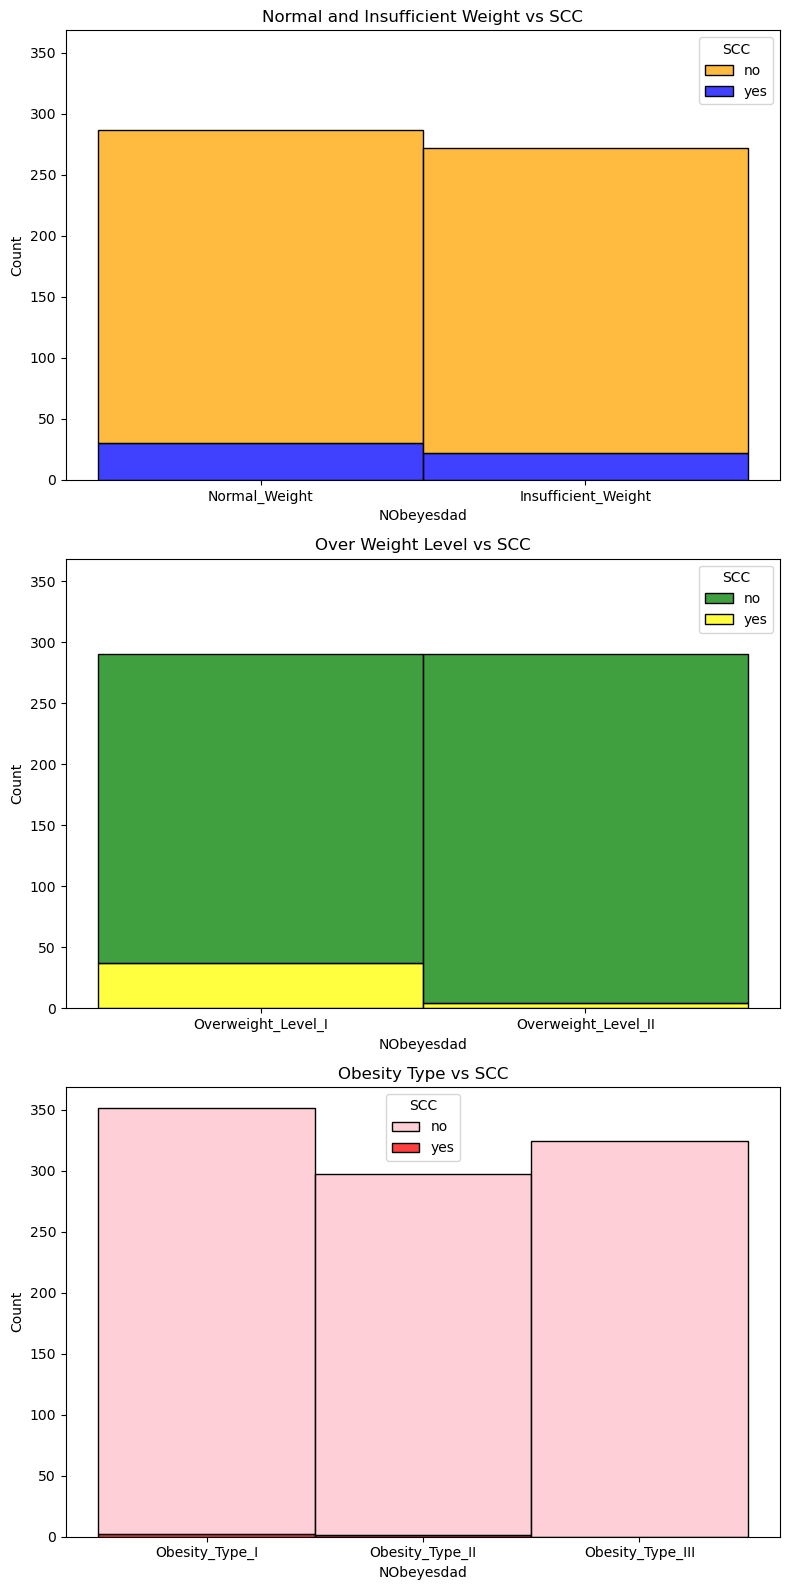

In [15]:
## SCC : Has candidats monitor the calories they eat daily?
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])




## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

sns.histplot(data=normalInsuff, x='NObeyesdad', hue='SCC',palette= ["orange","blue"], ax=axes[0], multiple='stack')
axes[0].set_title('Normal and Insufficient Weight vs SCC')

sns.histplot(data=overWeightLevel, x='NObeyesdad', hue='SCC',palette= ["green","yellow"], ax=axes[1], multiple='stack')
axes[1].set_title('Over Weight Level vs SCC')

sns.histplot(data=obesityType, x='NObeyesdad', hue='SCC',palette= ["pink","red"], ax=axes[2], multiple='stack')
axes[2].set_title('Obesity Type vs SCC')




plt.tight_layout()
plt.show()


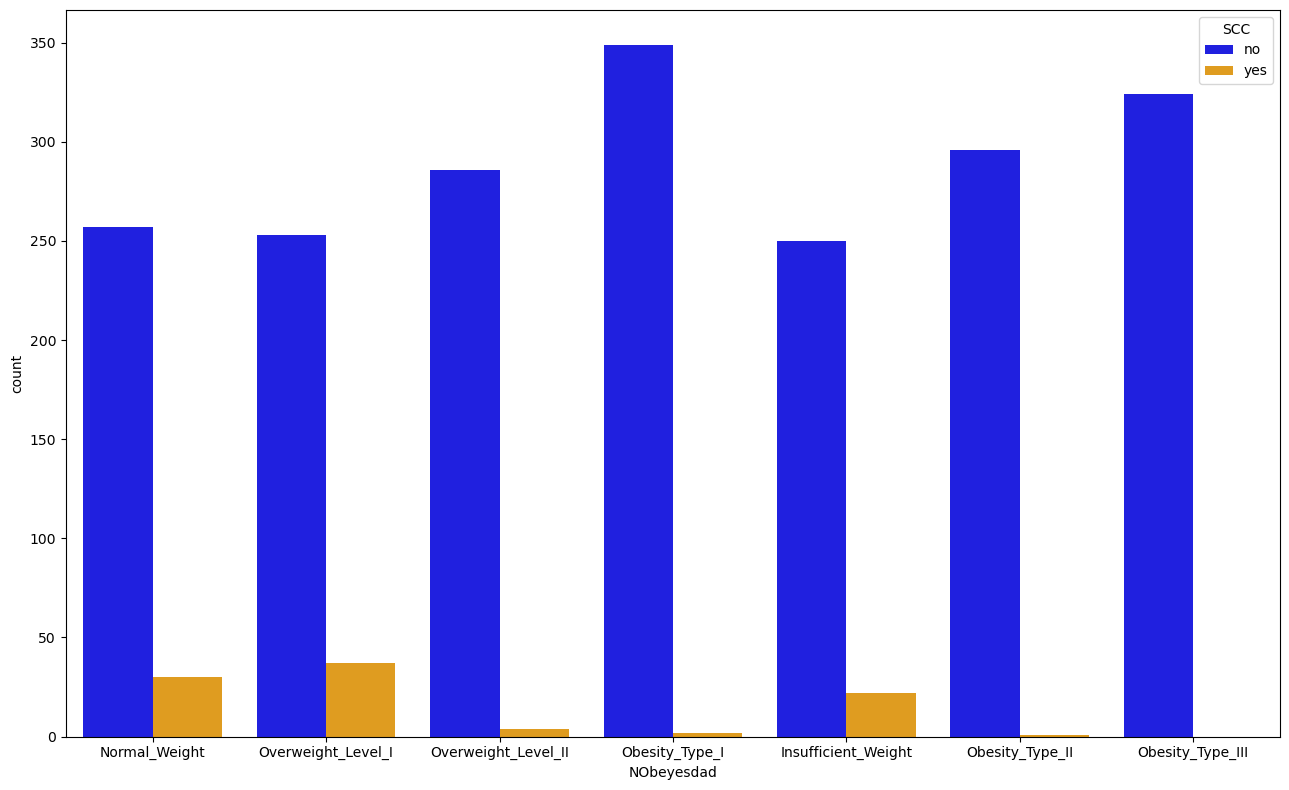

In [16]:
## SCC : Has candidats monitor the calories they eat daily?

## Plots
figure, axes = plt.subplots(figsize=(13,8))
figure = sns.countplot(data = obesity_data, x="NObeyesdad", hue="SCC", palette= ["blue", "orange"])


plt.tight_layout()
plt.show()


#### Globally, candidats of each group do not monitor the calories they eat daily.

### SMOKE

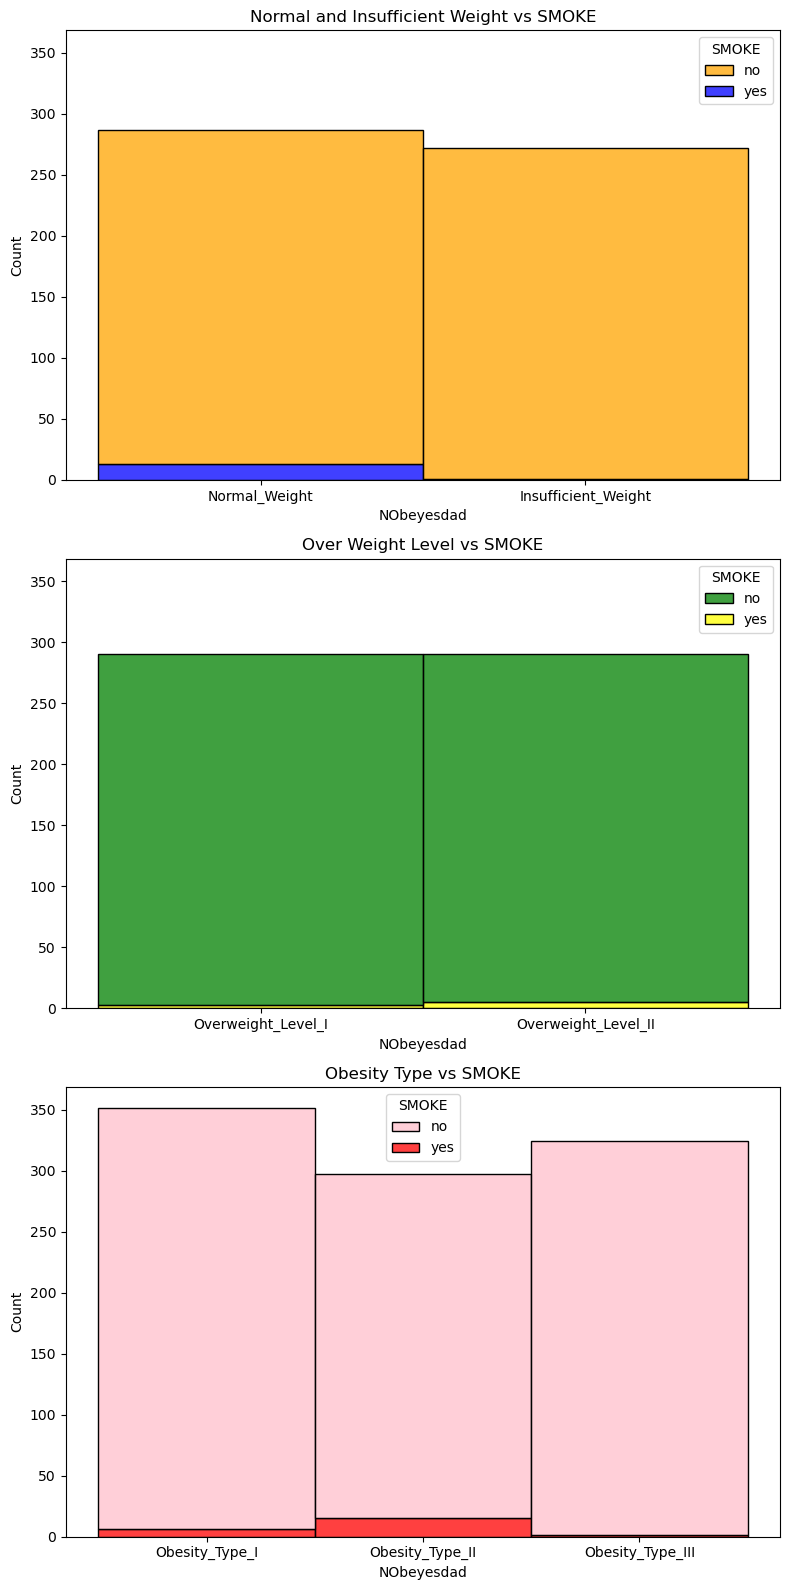

In [17]:
## SMOKE : Has candidats smoke?
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])



## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

sns.histplot(data=normalInsuff, x='NObeyesdad', hue='SMOKE',palette= ["orange","blue"], ax=axes[0], multiple='stack')
axes[0].set_title('Normal and Insufficient Weight vs SMOKE')

sns.histplot(data=overWeightLevel, x='NObeyesdad', hue='SMOKE',palette= ["green","yellow"], ax=axes[1], multiple='stack')
axes[1].set_title('Over Weight Level vs SMOKE')

sns.histplot(data=obesityType, x='NObeyesdad', hue='SMOKE',palette= ["pink","red"], ax=axes[2], multiple='stack')
axes[2].set_title('Obesity Type vs SMOKE')



plt.tight_layout()
plt.show()


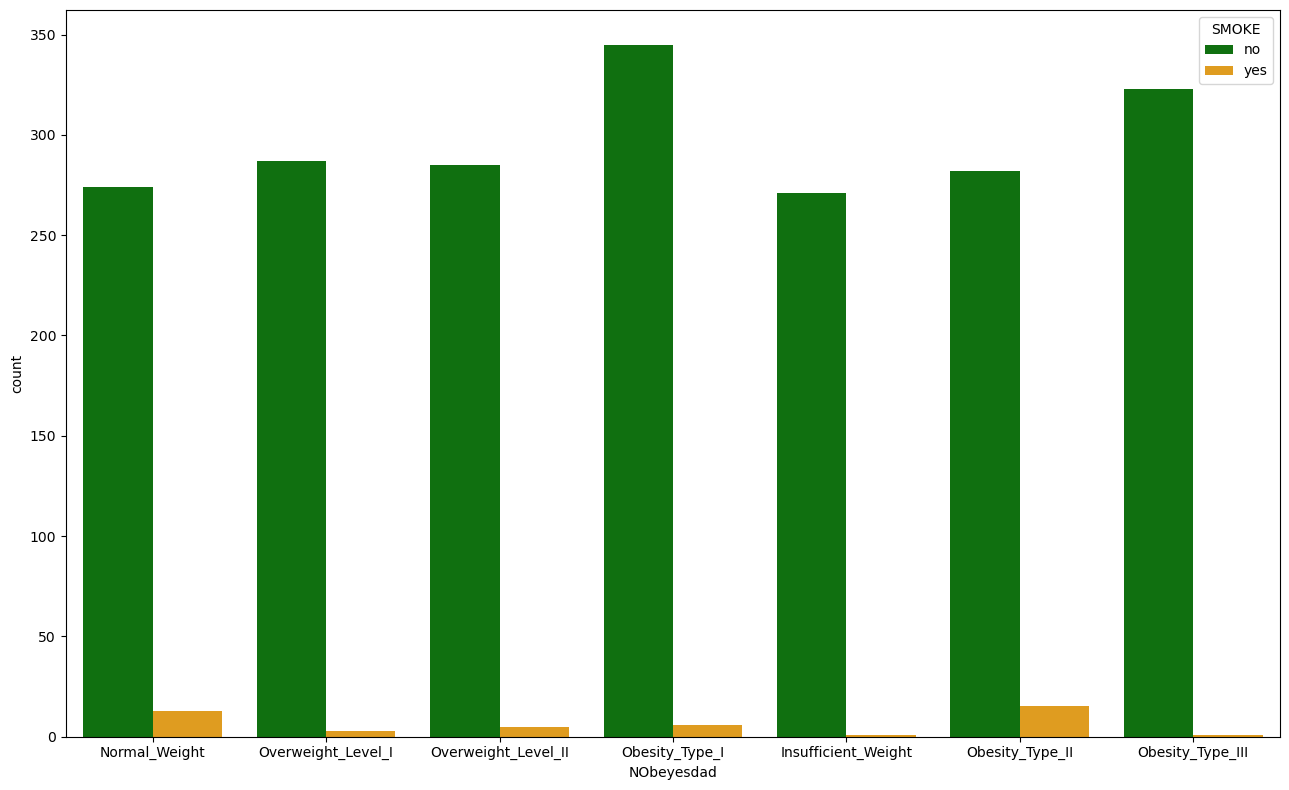

In [18]:
## SMOKE : Has candidats smoke?

## Plots
figure, axes = plt.subplots(figsize=(13,8))
figure = sns.countplot(data = obesity_data, x="NObeyesdad", hue="SMOKE", palette= ["green", "orange"])

plt.tight_layout()
plt.show()

#### We can see that in each group, candidats do not smoke globally.

### family_history_with_overweight

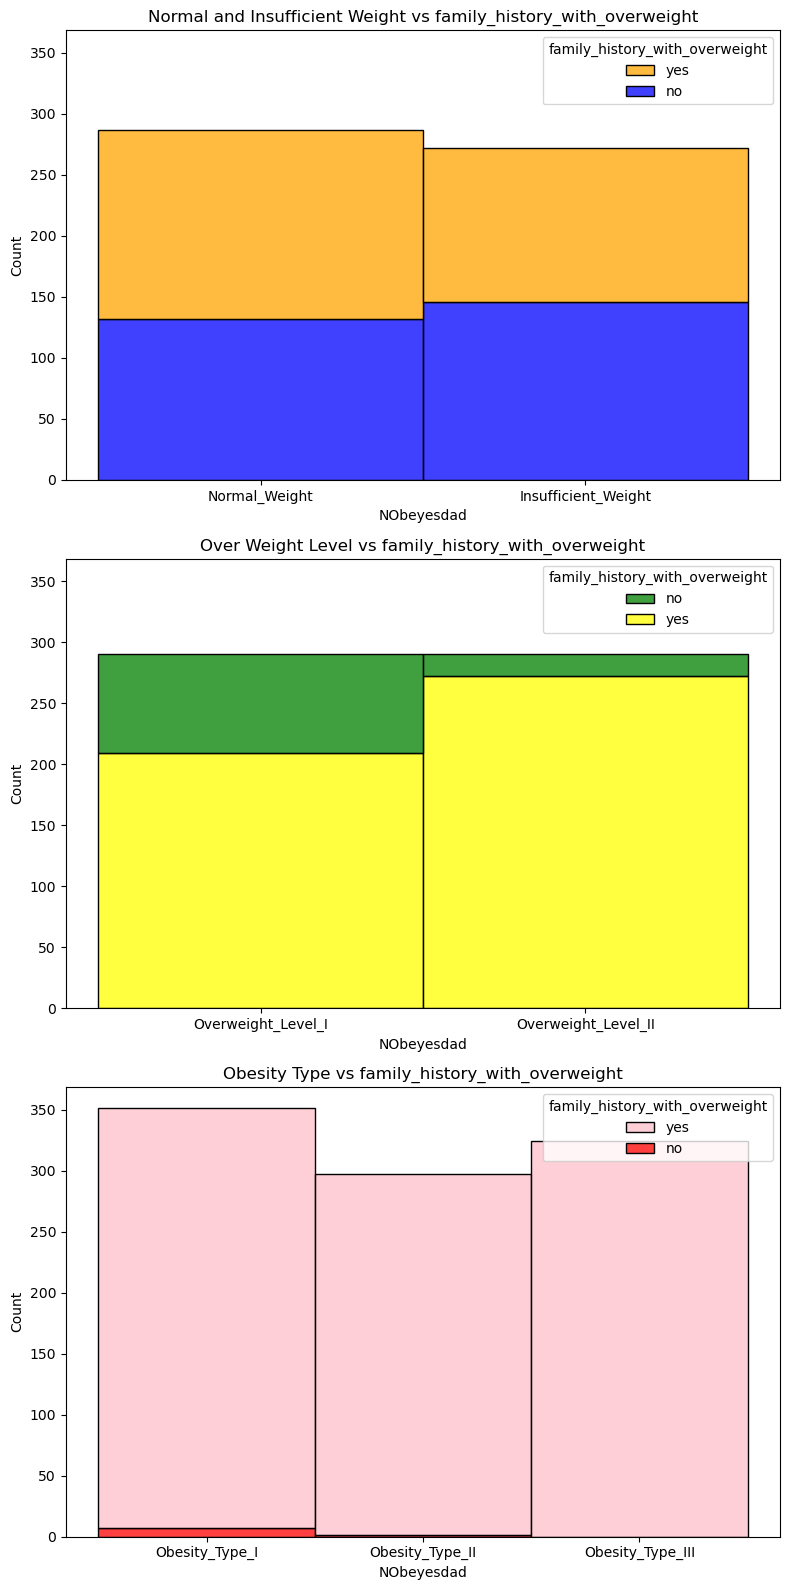

In [19]:
## family_history_with_overweight : Has a family member suffered or suffers from overweight?
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])



## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

sns.histplot(data=normalInsuff, x='NObeyesdad', hue='family_history_with_overweight',palette= ["orange","blue"], ax=axes[0], multiple='stack')
axes[0].set_title('Normal and Insufficient Weight vs family_history_with_overweight')

sns.histplot(data=overWeightLevel, x='NObeyesdad', hue='family_history_with_overweight',palette= ["green","yellow"], ax=axes[1], multiple='stack')
axes[1].set_title('Over Weight Level vs family_history_with_overweight')

sns.histplot(data=obesityType, x='NObeyesdad', hue='family_history_with_overweight',palette= ["pink","red", "yellow"], ax=axes[2], multiple='stack')
axes[2].set_title('Obesity Type vs family_history_with_overweight')




plt.tight_layout()
plt.show()


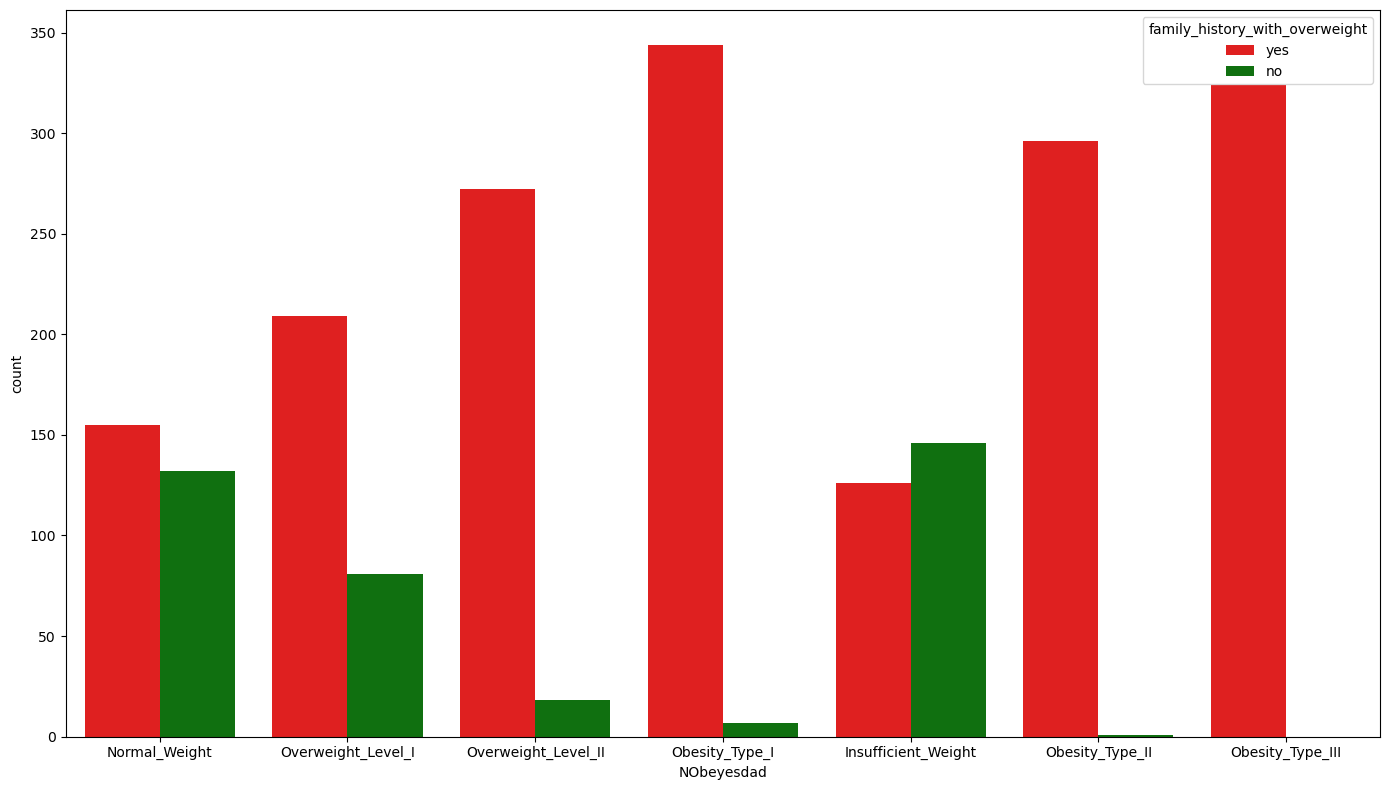

In [20]:
## family_history_with_overweight : Has a family member suffered or suffers from overweight?


## Plots
figure, axes = plt.subplots(figsize=(14,8))
figure = sns.countplot(data = obesity_data, x="NObeyesdad", hue="family_history_with_overweight", palette= ["red", "green"])

plt.tight_layout()
plt.show()

#### In each group, candidats have a family member suffered or suffers from overweight.

### CAEC

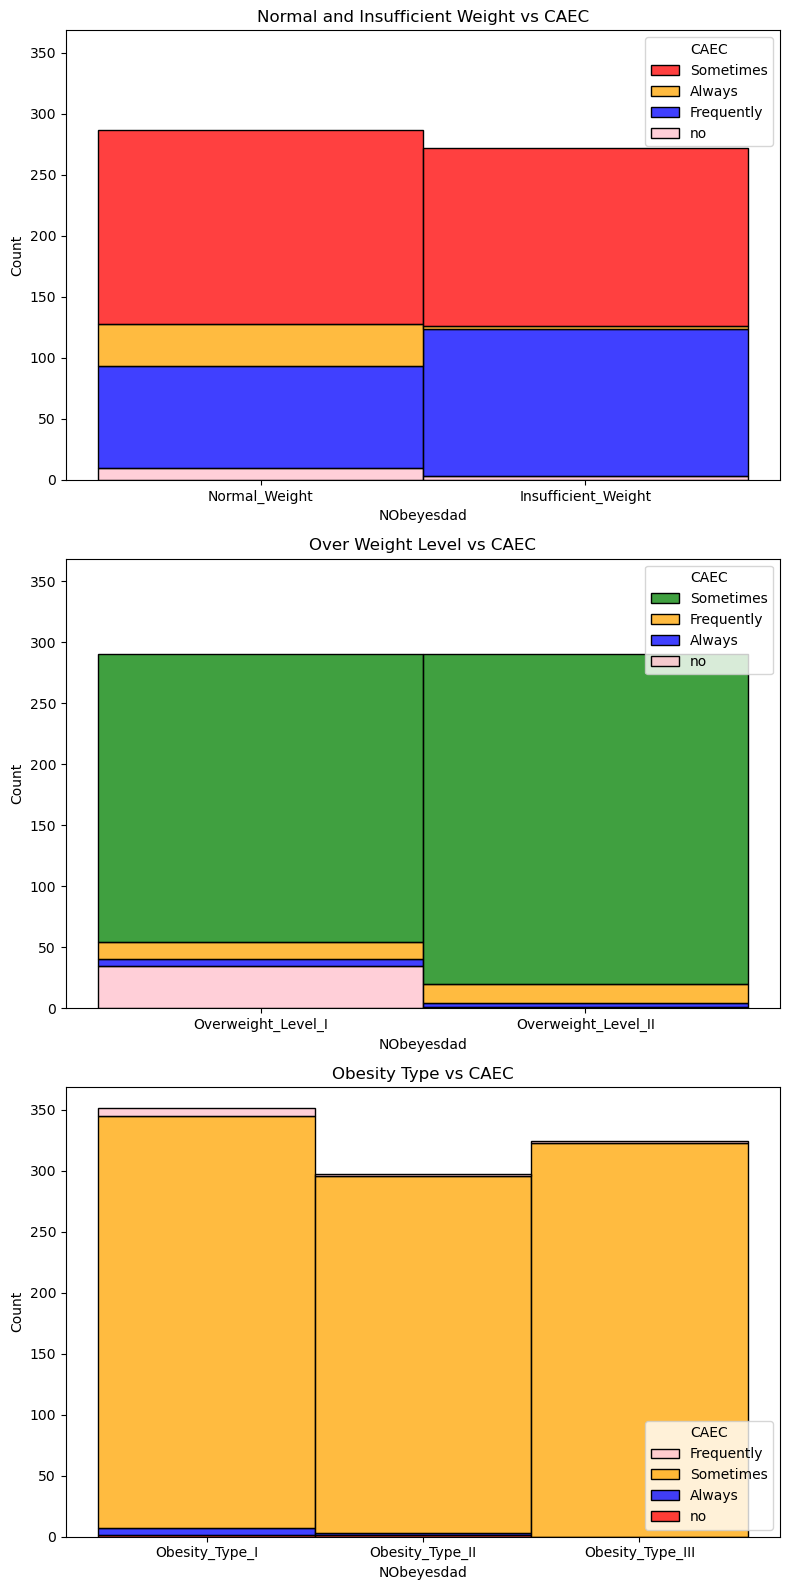

In [21]:
## CAEC : Has candidats eat any food between meals?
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])



## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

sns.histplot(data=normalInsuff, x='NObeyesdad', hue='CAEC',palette= ["red","orange","blue", "pink"], ax=axes[0], multiple='stack')
axes[0].set_title('Normal and Insufficient Weight vs CAEC')

sns.histplot(data=overWeightLevel, x='NObeyesdad', hue='CAEC',palette= ["green","orange","blue", "pink"], ax=axes[1], multiple='stack')
axes[1].set_title('Over Weight Level vs CAEC')

sns.histplot(data=obesityType, x='NObeyesdad', hue='CAEC',palette= ["pink","orange","blue","red"], ax=axes[2], multiple='stack')
axes[2].set_title('Obesity Type vs CAEC')




plt.tight_layout()
plt.show()


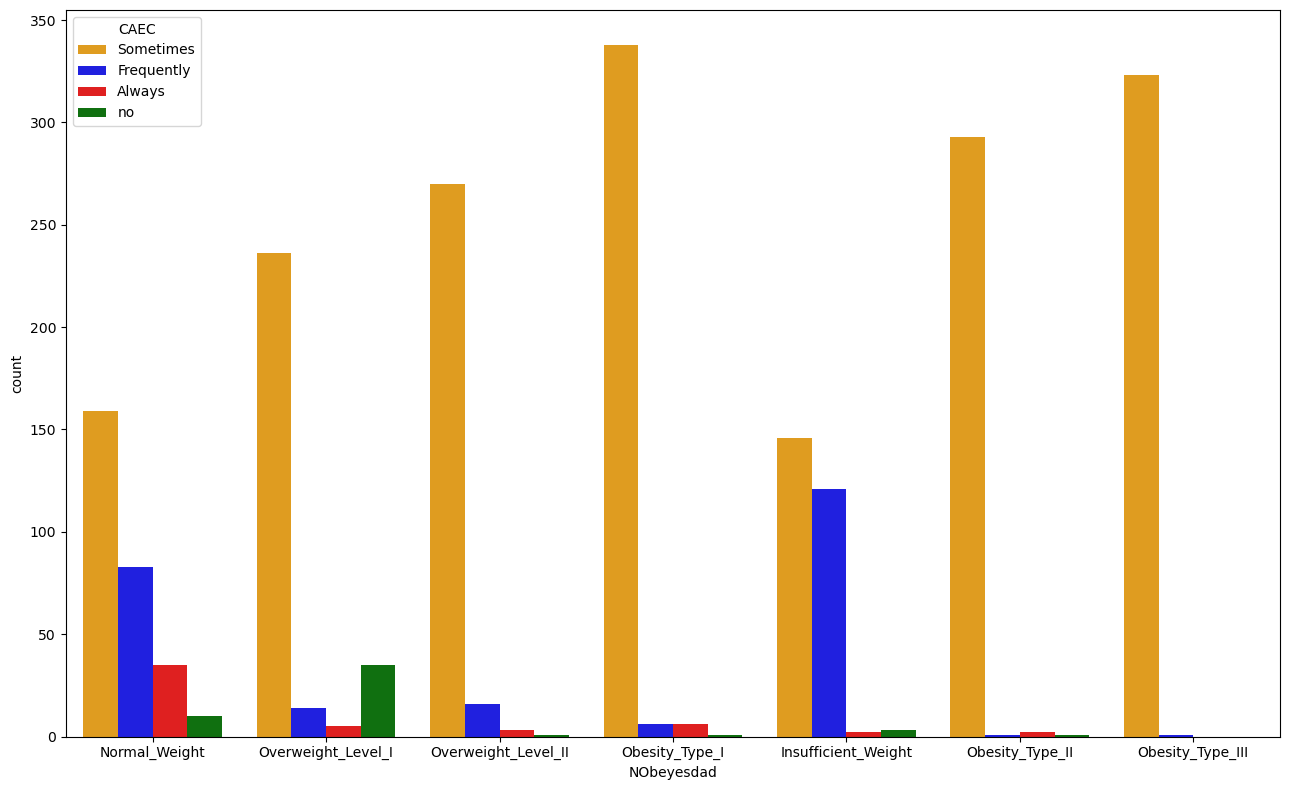

In [22]:
## CAEC : Has candidats eat any food between meals?

## Plots
figure, axes = plt.subplots(figsize=(13,8))
figure = sns.countplot(data = obesity_data, x="NObeyesdad", hue="CAEC", palette= ["orange", "blue","red", "green"])

plt.tight_layout()
plt.show()


####  Candidats eat food between meals in each group.

### MTRANS

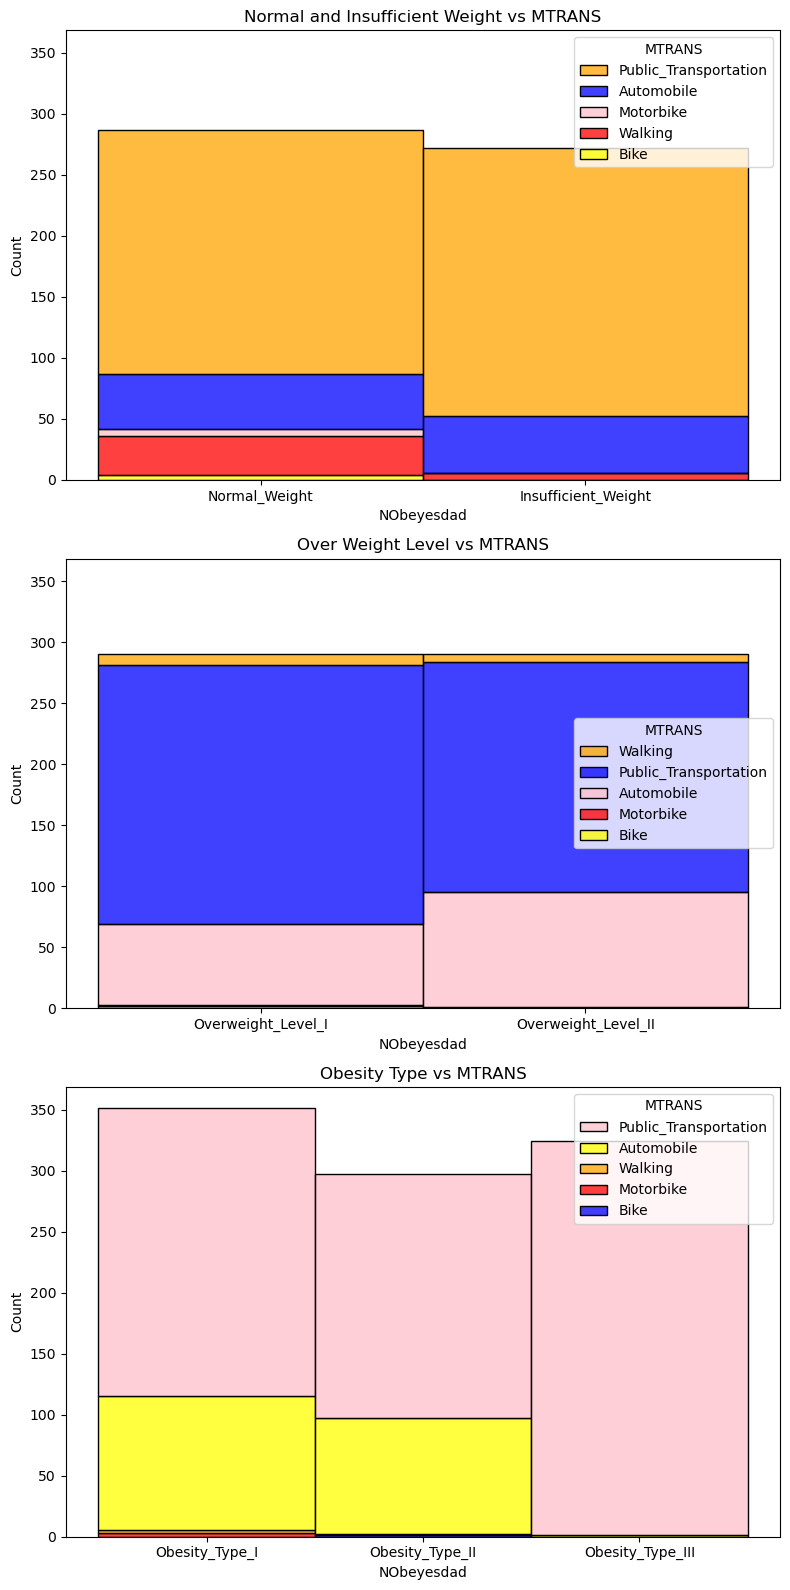

In [23]:
## MTRANS : Which transportation candidats usually use?
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])




## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

sns.histplot(data=normalInsuff, x='NObeyesdad', hue='MTRANS',palette= ["orange","blue","pink","red","yellow"], ax=axes[0], multiple='stack')
axes[0].set_title('Normal and Insufficient Weight vs MTRANS')

sns.histplot(data=overWeightLevel, x='NObeyesdad', hue='MTRANS',palette= ["orange","blue","pink","red","yellow"], ax=axes[1], multiple='stack')
axes[1].set_title('Over Weight Level vs MTRANS')

sns.histplot(data=obesityType, x='NObeyesdad', hue='MTRANS',palette= ["pink","yellow","orange","red","blue"], ax=axes[2], multiple='stack')
axes[2].set_title('Obesity Type vs MTRANS')




plt.tight_layout()
plt.show()


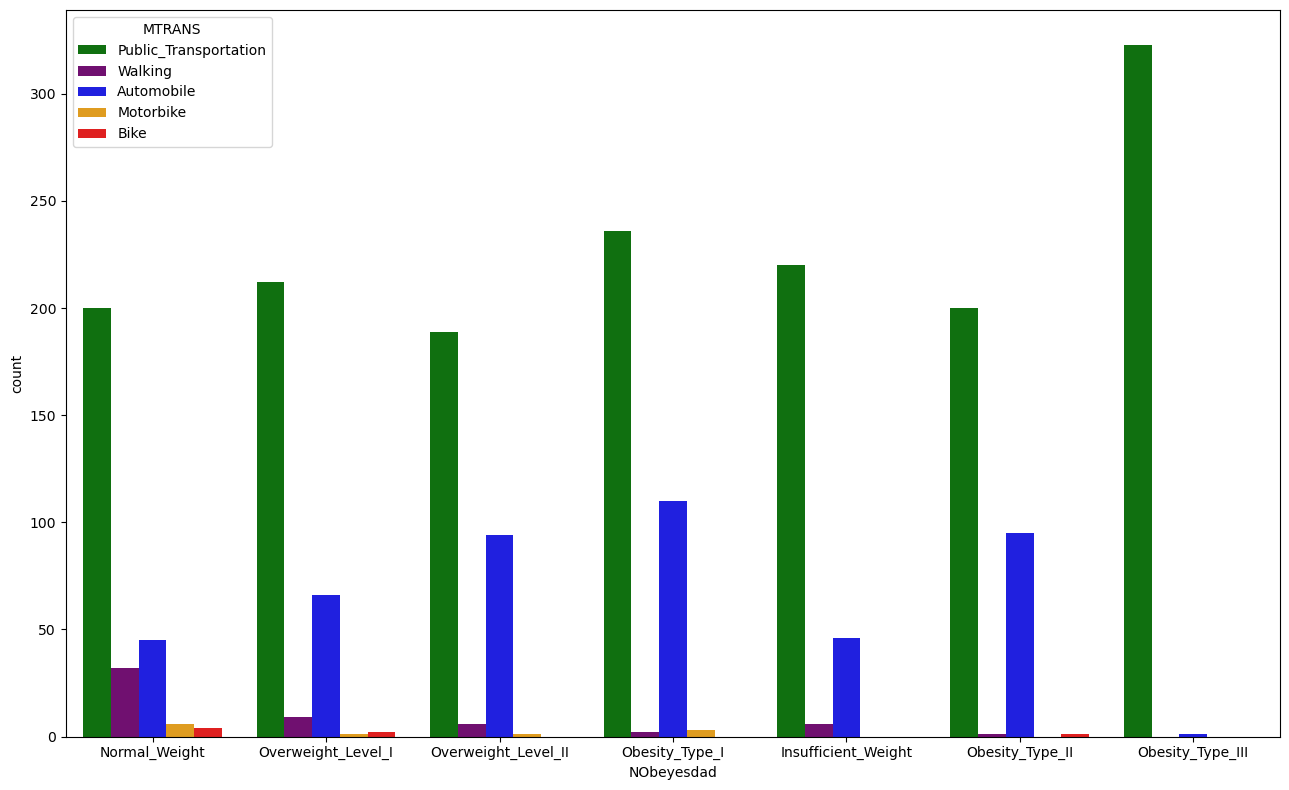

In [24]:
## MTRANS : Which transportation candidats usually use?

## Plot
figure, axes = plt.subplots(figsize=(13,8))
figure = sns.countplot(data = obesity_data, x="NObeyesdad", hue="MTRANS", palette= ["green","purple","blue", "orange","red"])


plt.tight_layout()
plt.show()


####  All candidats of each group usually use public transportation.

### Distributions of continuous features : 

### Age

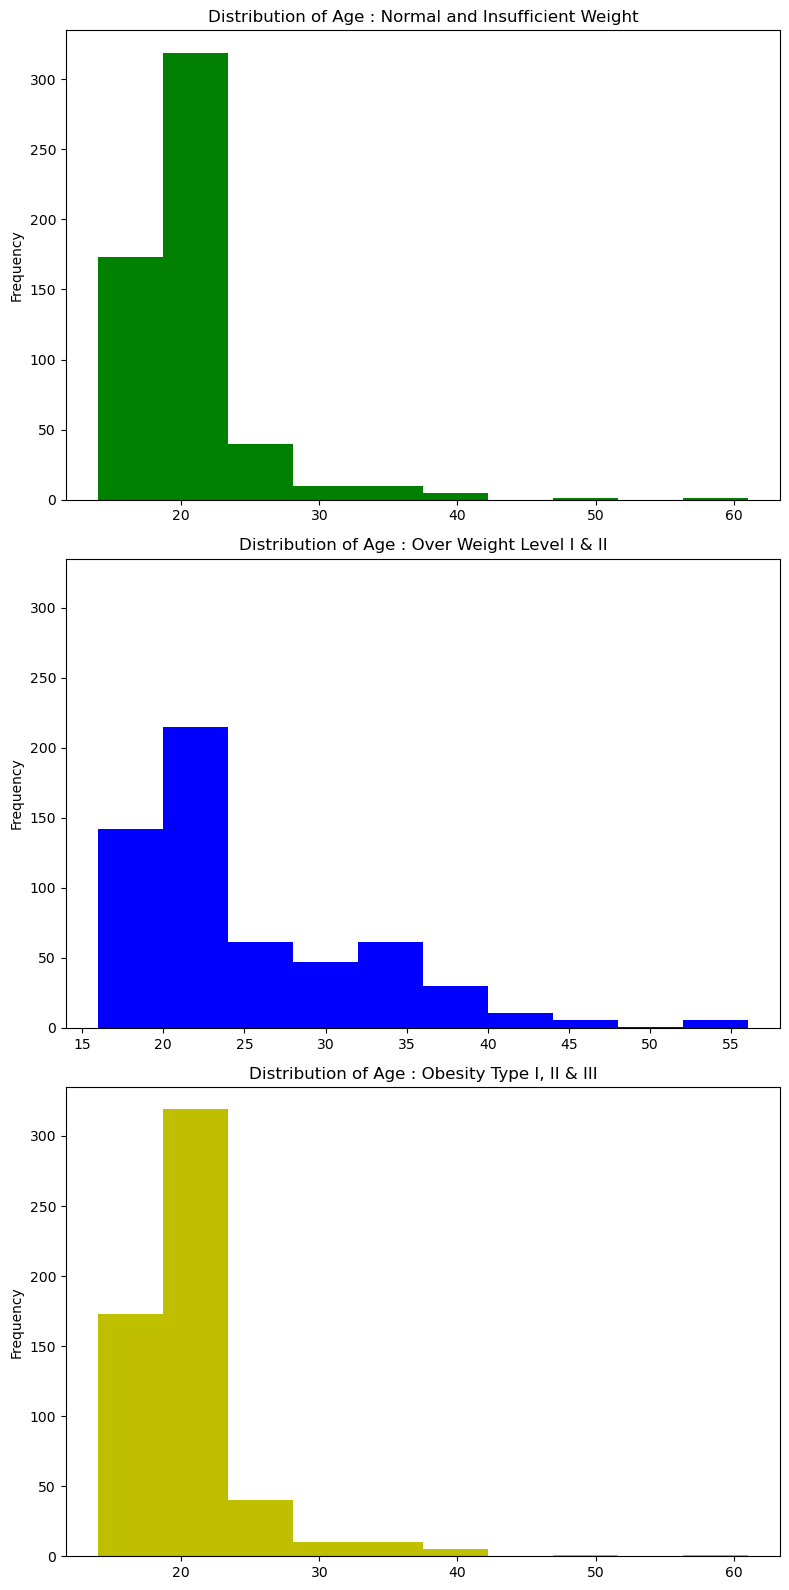

In [25]:
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])

## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

normalInsuff["Age"].plot.hist(color="g", bins=10, ax=axes[0])
axes[0].set_title('Distribution of Age : Normal and Insufficient Weight')

overWeightLevel["Age"].plot.hist(color="b", bins=10, ax=axes[1])
axes[1].set_title('Distribution of Age : Over Weight Level I & II')

normalInsuff["Age"].plot.hist(color="y", bins=10, ax=axes[2])
axes[2].set_title('Distribution of Age : Obesity Type I, II & III')


plt.tight_layout()
plt.show()

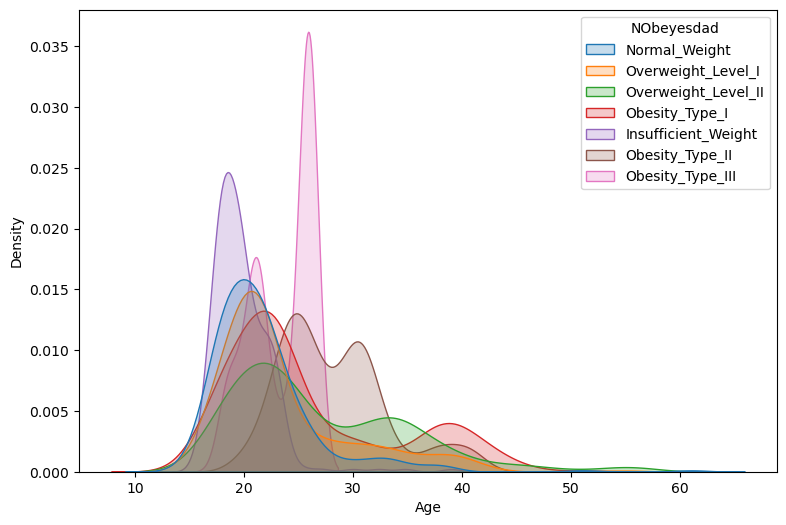

In [26]:
## Plot
figure, axes = plt.subplots(figsize=(9,6))
figure = sns.kdeplot(data=obesity_data, x="Age", hue="NObeyesdad", fill= True)

plt.show()

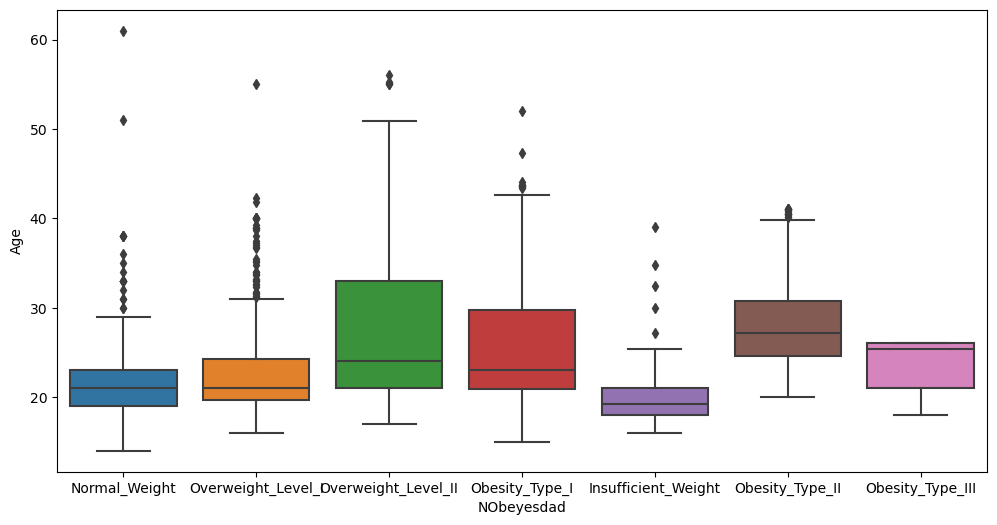

In [27]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=obesity_data, x="NObeyesdad", y="Age")

plt.show()

### Height

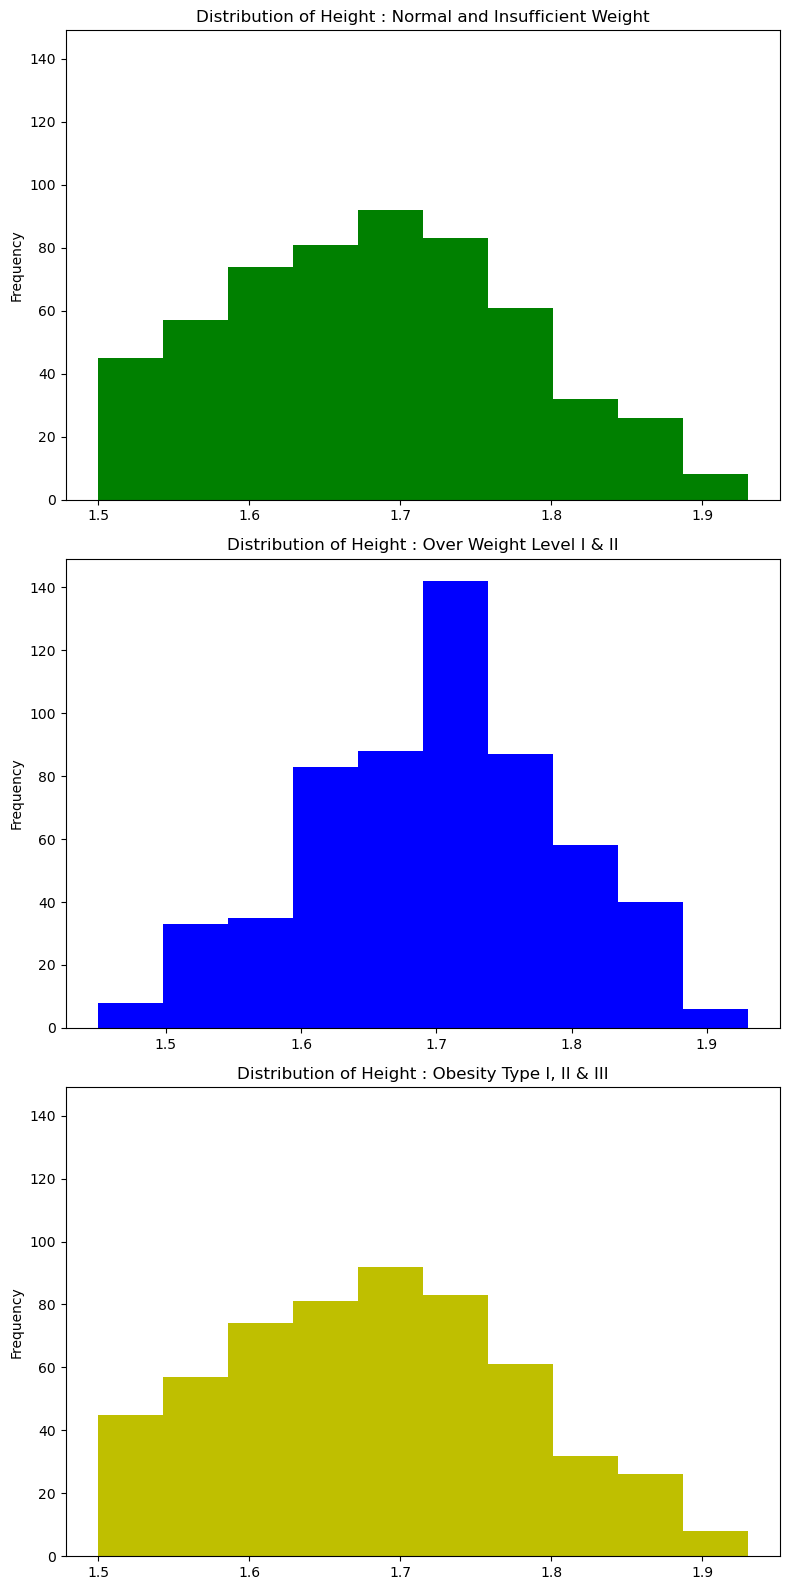

In [28]:
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])

## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

normalInsuff["Height"].plot.hist(color="g", bins=10, ax=axes[0])
axes[0].set_title('Distribution of Height : Normal and Insufficient Weight')

overWeightLevel["Height"].plot.hist(color="b", bins=10, ax=axes[1])
axes[1].set_title('Distribution of Height : Over Weight Level I & II')

normalInsuff["Height"].plot.hist(color="y", bins=10, ax=axes[2])
axes[2].set_title('Distribution of Height : Obesity Type I, II & III')


plt.tight_layout()
plt.show()

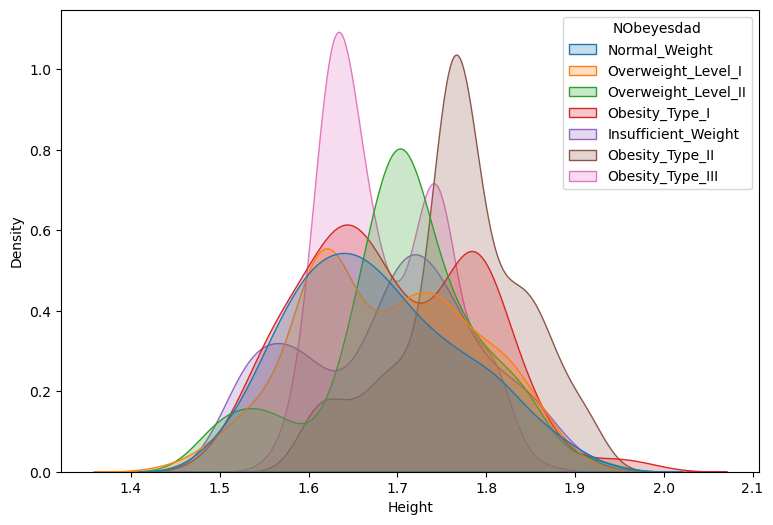

In [29]:
## Plot
figure, axes = plt.subplots(figsize=(9,6))
figure = sns.kdeplot(data=obesity_data, x="Height", hue="NObeyesdad", fill= True)

plt.show()

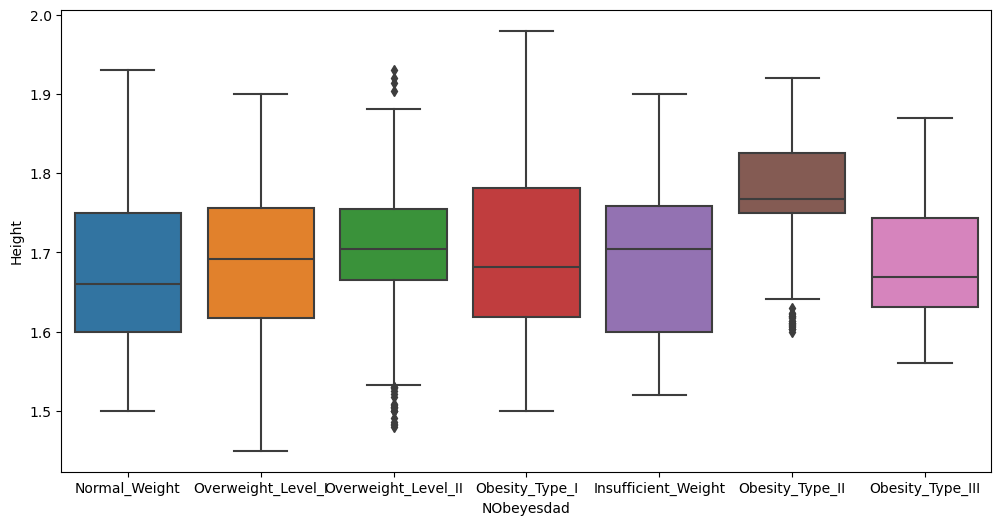

In [30]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=obesity_data, x="NObeyesdad", y="Height")

plt.show()

### Weight

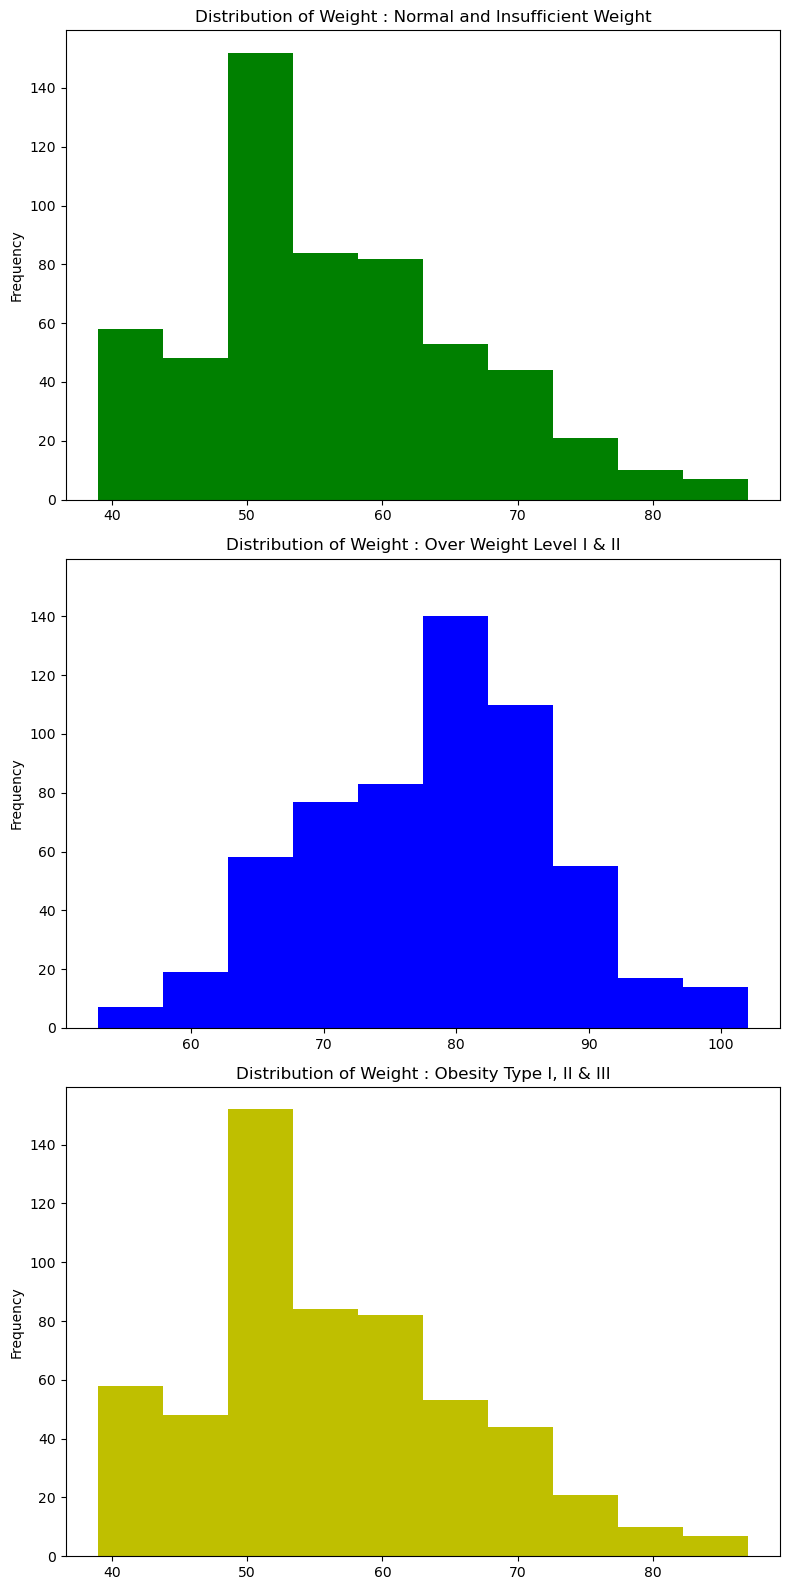

In [31]:
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])

## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

normalInsuff["Weight"].plot.hist(color="g", bins=10, ax=axes[0])
axes[0].set_title('Distribution of Weight : Normal and Insufficient Weight')

overWeightLevel["Weight"].plot.hist(color="b", bins=10, ax=axes[1])
axes[1].set_title('Distribution of Weight : Over Weight Level I & II')

normalInsuff["Weight"].plot.hist(color="y", bins=10, ax=axes[2])
axes[2].set_title('Distribution of Weight : Obesity Type I, II & III')


plt.tight_layout()
plt.show()

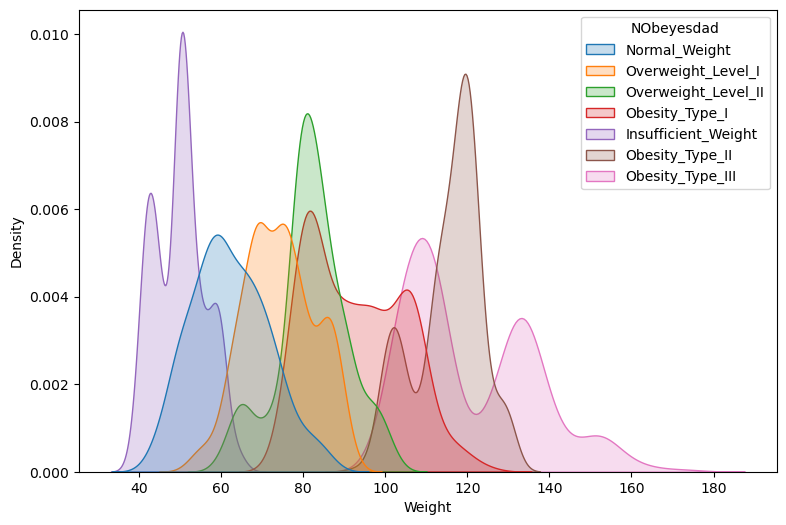

In [32]:
## Plot
figure, axes = plt.subplots(figsize=(9,6))
figure = sns.kdeplot(data=obesity_data, x="Weight", hue="NObeyesdad", fill= True)

plt.show()

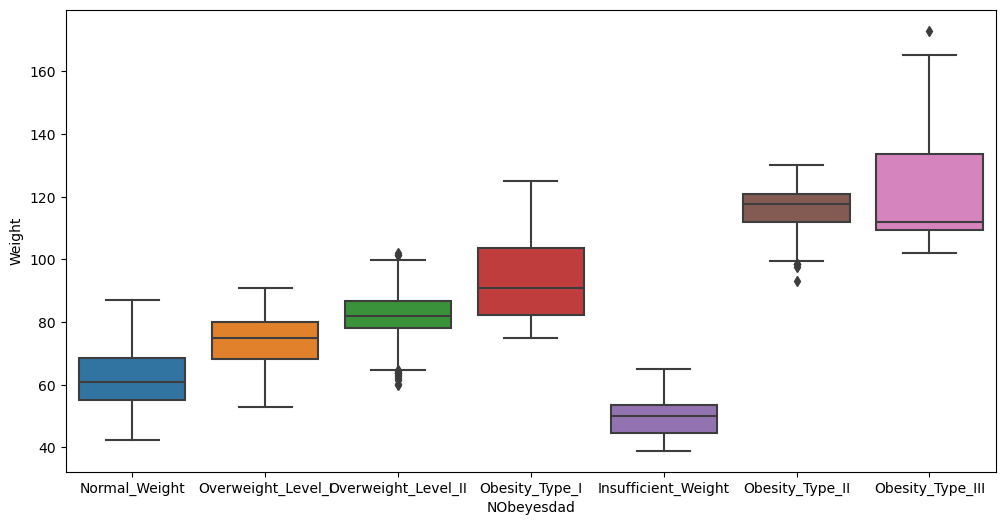

In [33]:
## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=obesity_data, x="NObeyesdad", y="Weight")

plt.show()

### FCVC

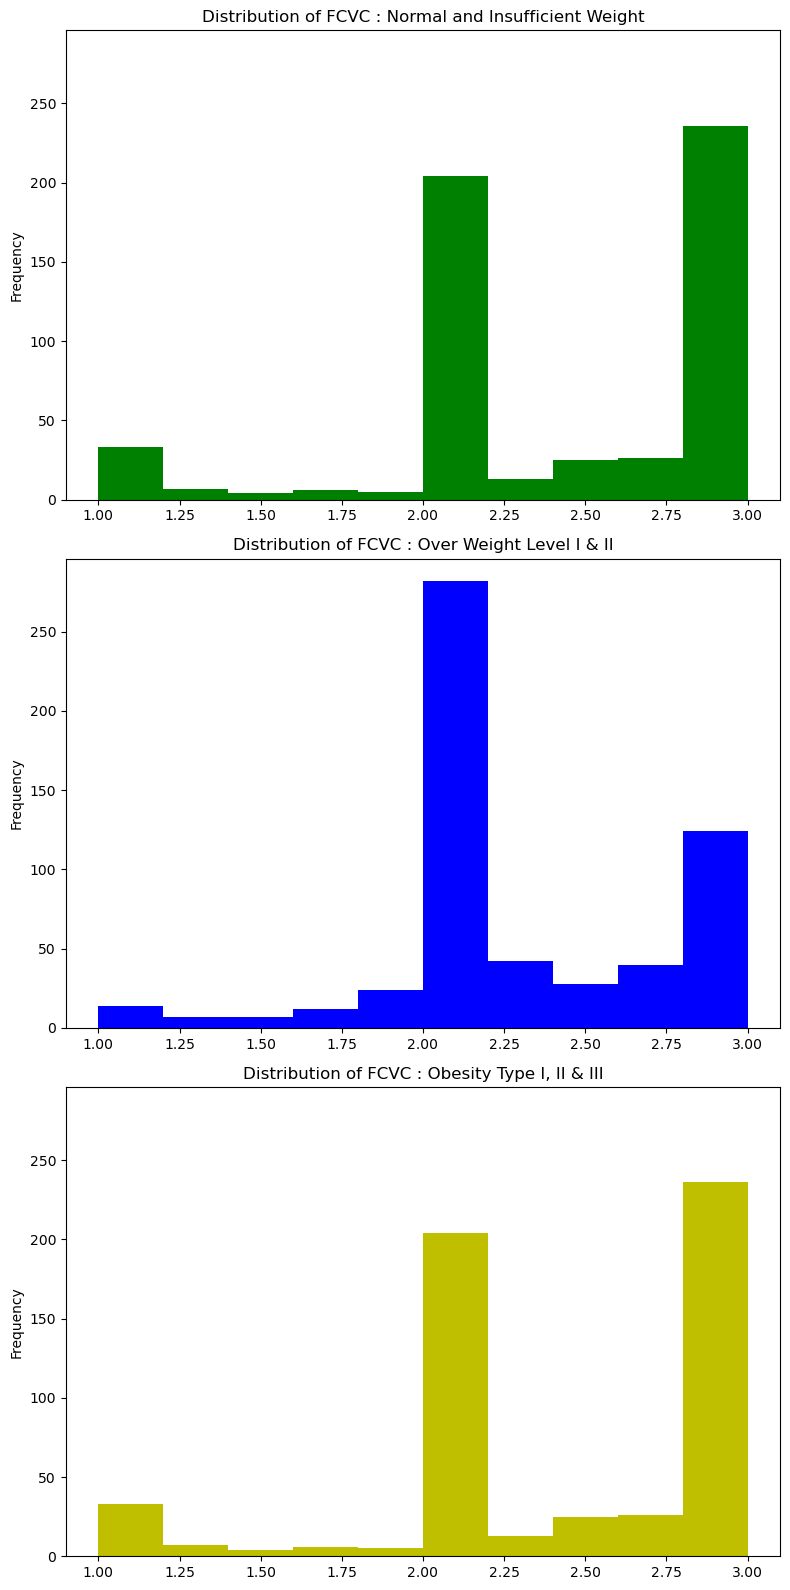

In [34]:
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])

## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

normalInsuff["FCVC"].plot.hist(color="g", bins=10, ax=axes[0])
axes[0].set_title('Distribution of FCVC : Normal and Insufficient Weight')

overWeightLevel["FCVC"].plot.hist(color="b", bins=10, ax=axes[1])
axes[1].set_title('Distribution of FCVC : Over Weight Level I & II')

normalInsuff["FCVC"].plot.hist(color="y", bins=10, ax=axes[2])
axes[2].set_title('Distribution of FCVC : Obesity Type I, II & III')


plt.tight_layout()
plt.show()

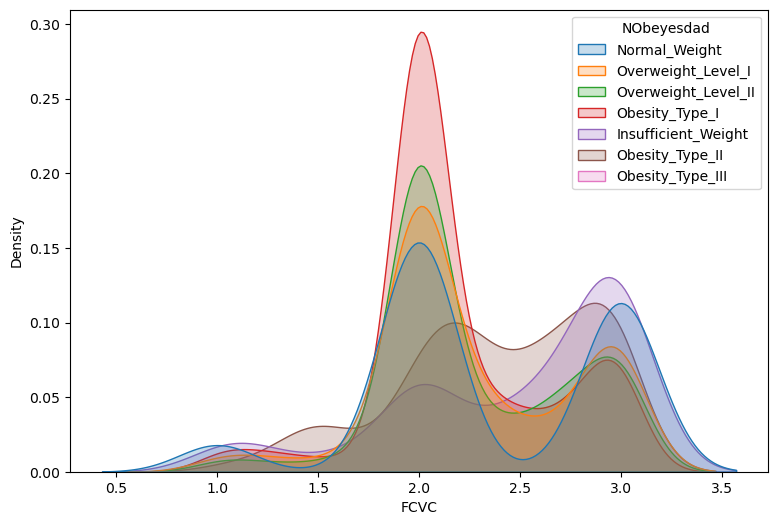

In [35]:
## FCVC : Do you usually eat vegetables in your meals?

## Plot
figure, axes = plt.subplots(figsize=(9,6))
figure = sns.kdeplot(data=obesity_data, x="FCVC", hue="NObeyesdad", fill= True)

plt.show()

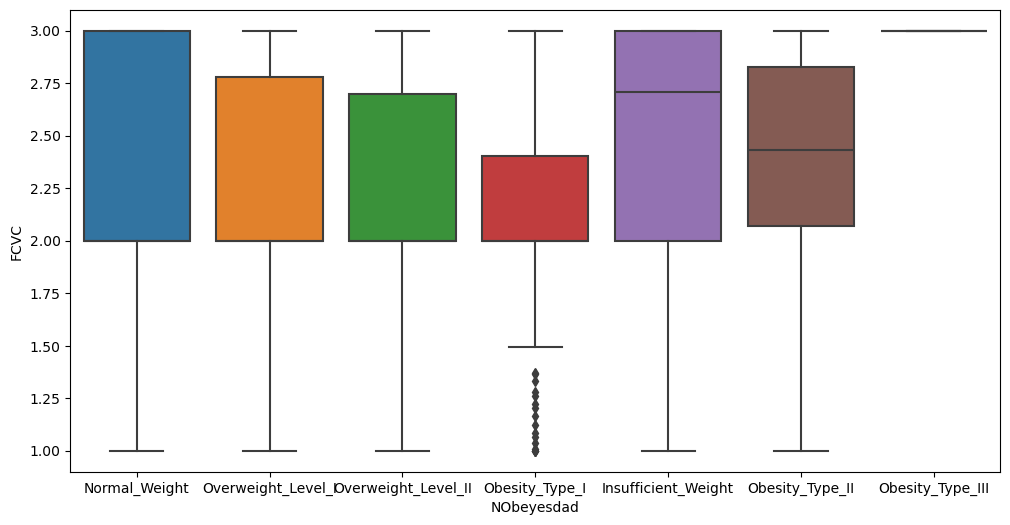

In [36]:
## FCVC : Do you usually eat vegetables in your meals?

## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=obesity_data, x="NObeyesdad", y="FCVC")

plt.show()

### NCP

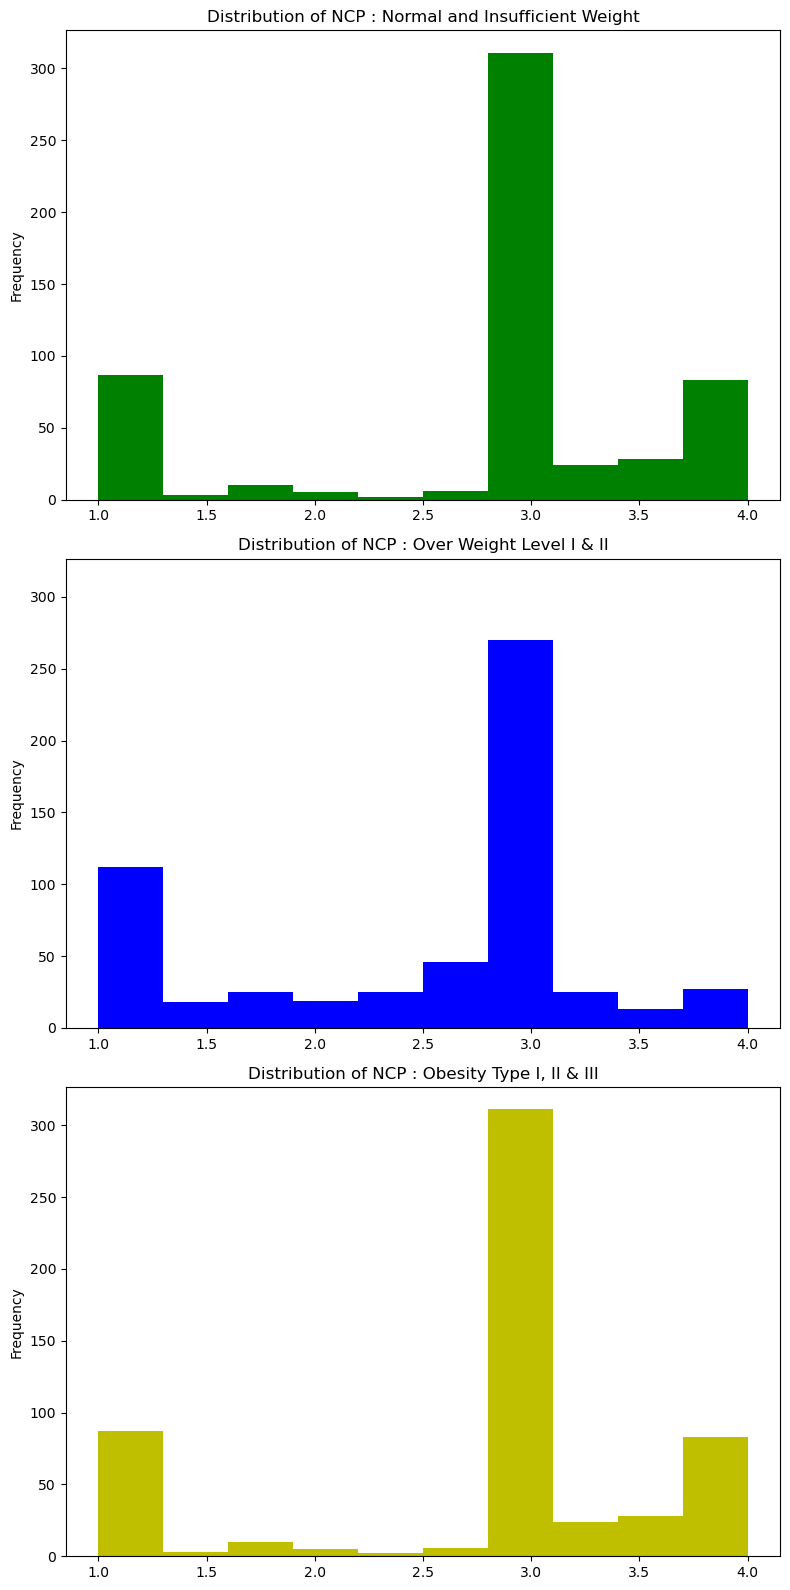

In [37]:
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])

## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

normalInsuff["NCP"].plot.hist(color="g", bins=10, ax=axes[0])
axes[0].set_title('Distribution of NCP : Normal and Insufficient Weight')

overWeightLevel["NCP"].plot.hist(color="b", bins=10, ax=axes[1])
axes[1].set_title('Distribution of NCP : Over Weight Level I & II')

normalInsuff["NCP"].plot.hist(color="y", bins=10, ax=axes[2])
axes[2].set_title('Distribution of NCP : Obesity Type I, II & III')


plt.tight_layout()
plt.show()

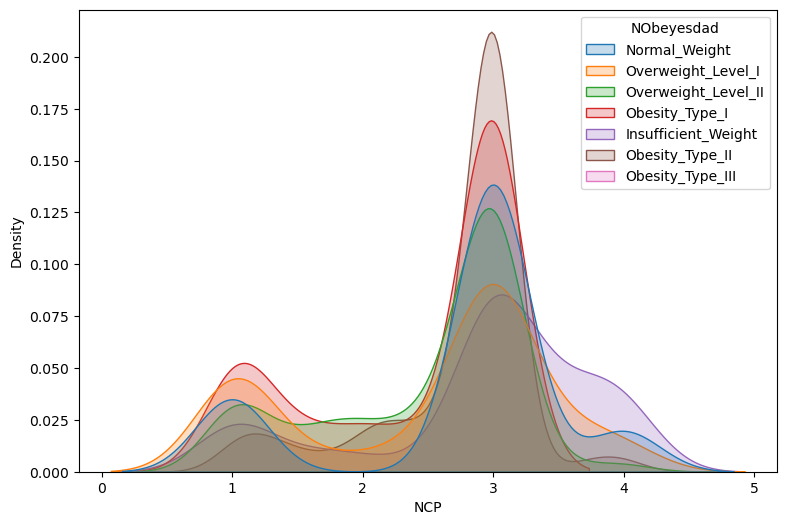

In [38]:
## NCP : How many main meals do you have daily?

## Plot
figure, axes = plt.subplots(figsize=(9,6))
figure = sns.kdeplot(data=obesity_data, x="NCP", hue="NObeyesdad", fill= True)

plt.show()

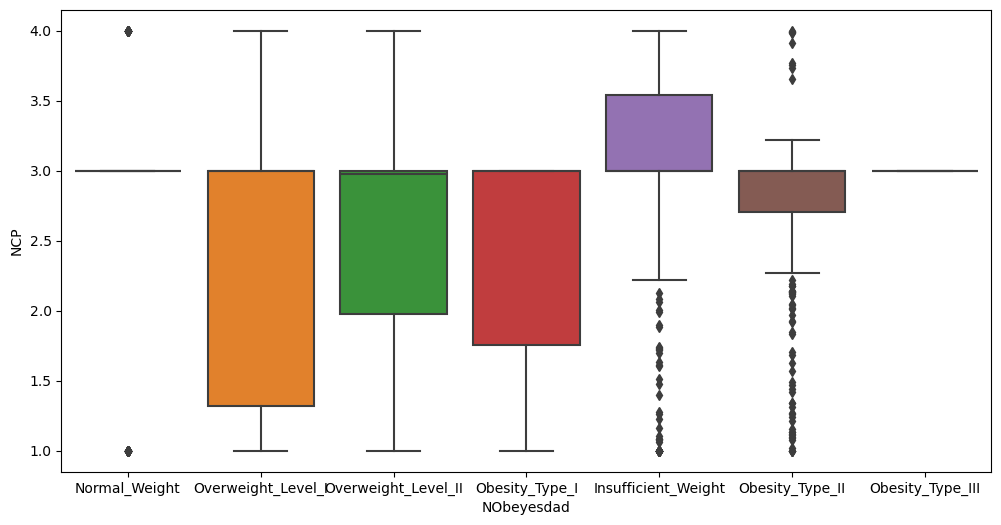

In [39]:
## NCP : How many main meals do you have daily?

## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=obesity_data, x="NObeyesdad", y="NCP")

plt.show()

### CH2O

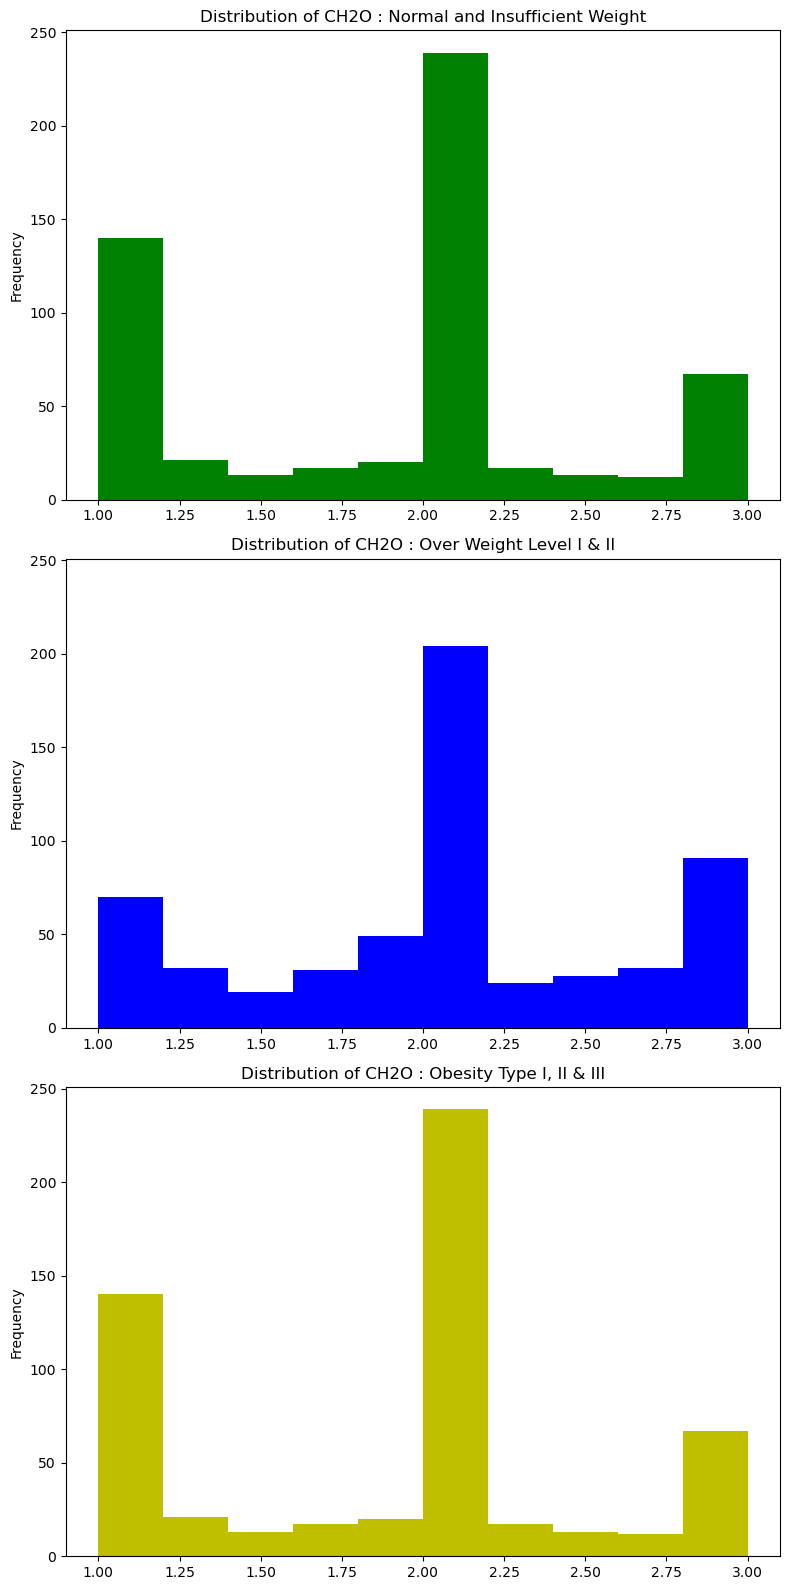

In [40]:
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])

## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

normalInsuff["CH2O"].plot.hist(color="g", bins=10, ax=axes[0])
axes[0].set_title('Distribution of CH2O : Normal and Insufficient Weight')

overWeightLevel["CH2O"].plot.hist(color="b", bins=10, ax=axes[1])
axes[1].set_title('Distribution of CH2O : Over Weight Level I & II')

normalInsuff["CH2O"].plot.hist(color="y", bins=10, ax=axes[2])
axes[2].set_title('Distribution of CH2O : Obesity Type I, II & III')


plt.tight_layout()
plt.show()

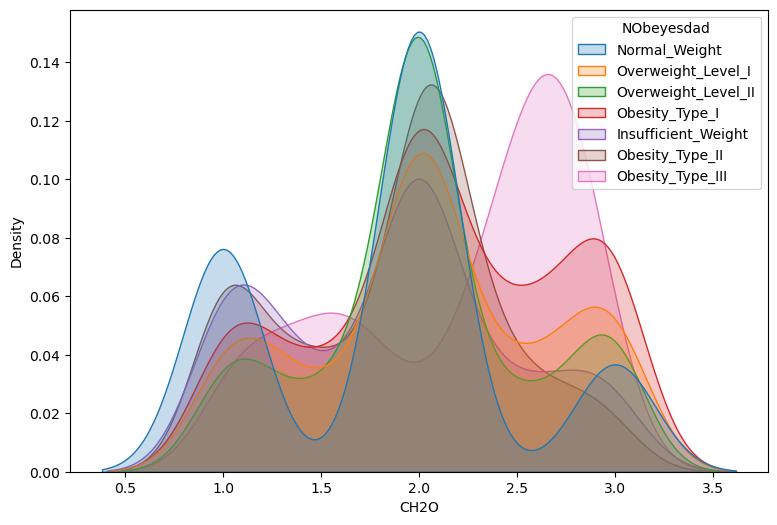

In [41]:
## CH2O : How much water do you drink daily?

## Plot
figure, axes = plt.subplots(figsize=(9,6))
figure = sns.kdeplot(data=obesity_data, x="CH2O", hue="NObeyesdad", fill= True)

plt.show()

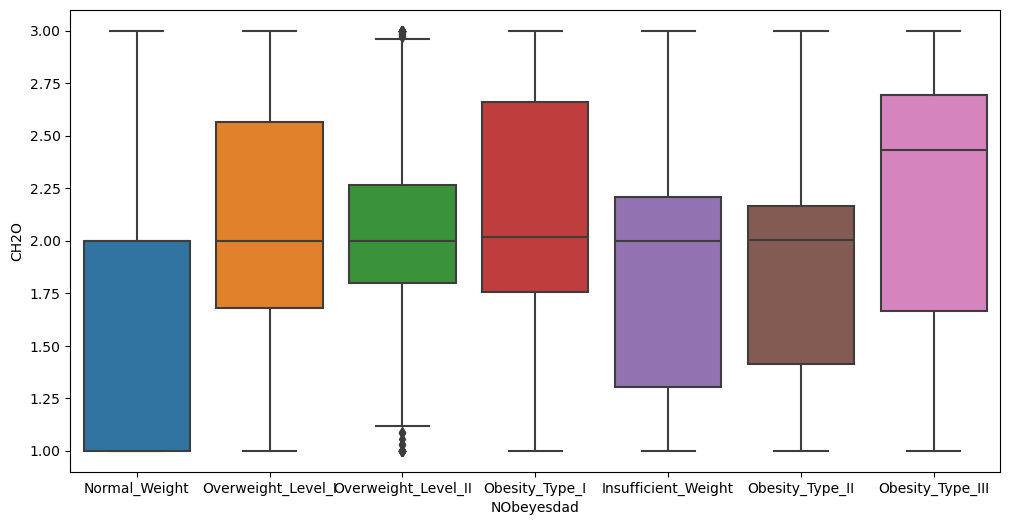

In [42]:
## CH2O : How much water do you drink daily?

## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=obesity_data, x="NObeyesdad", y="CH2O")

plt.show()

### FAF

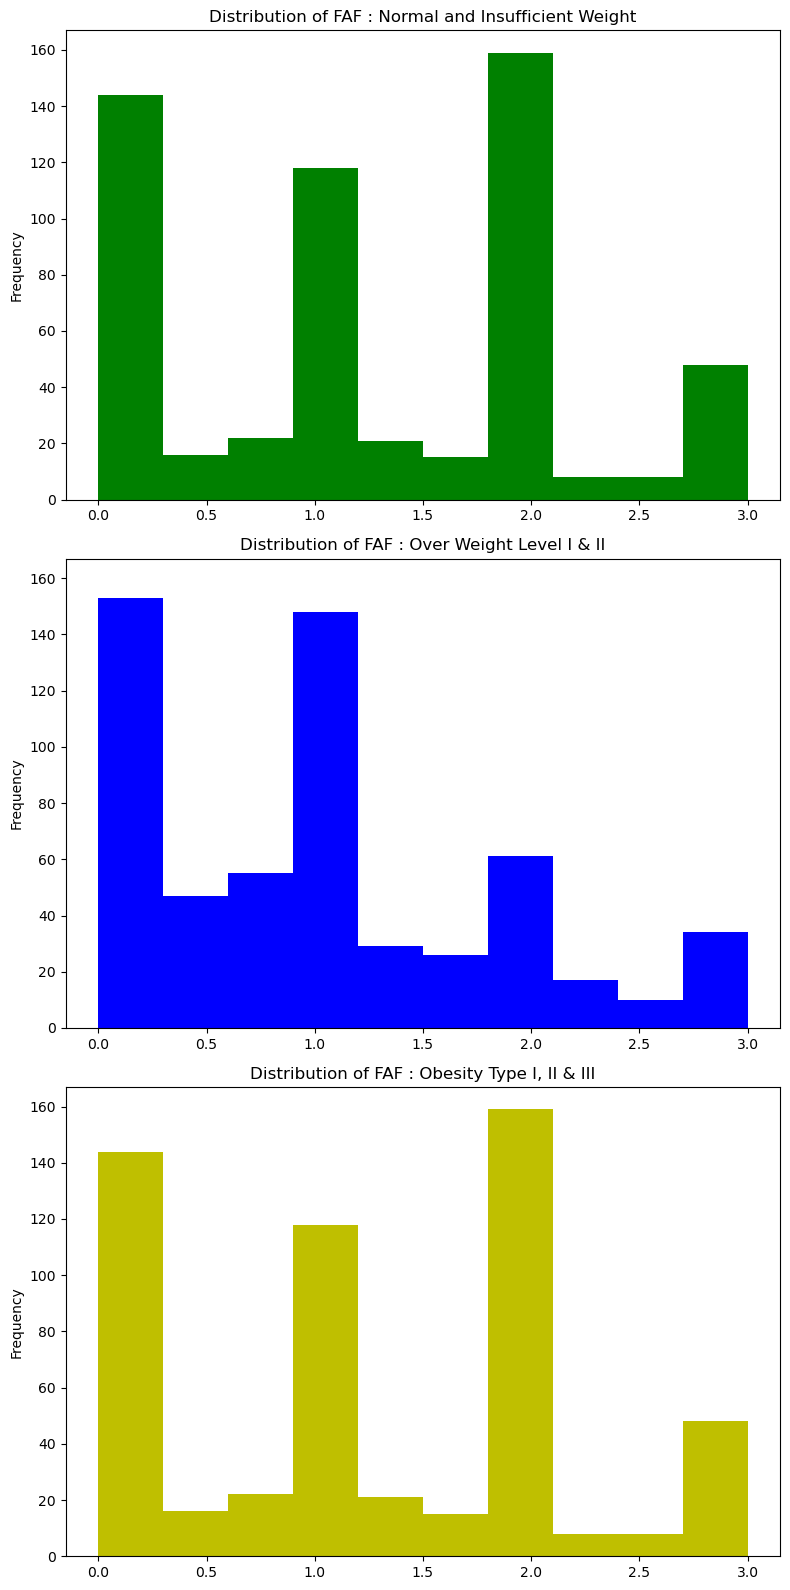

In [43]:
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])

## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

normalInsuff["FAF"].plot.hist(color="g", bins=10, ax=axes[0])
axes[0].set_title('Distribution of FAF : Normal and Insufficient Weight')

overWeightLevel["FAF"].plot.hist(color="b", bins=10, ax=axes[1])
axes[1].set_title('Distribution of FAF : Over Weight Level I & II')

normalInsuff["FAF"].plot.hist(color="y", bins=10, ax=axes[2])
axes[2].set_title('Distribution of FAF : Obesity Type I, II & III')


plt.tight_layout()
plt.show()

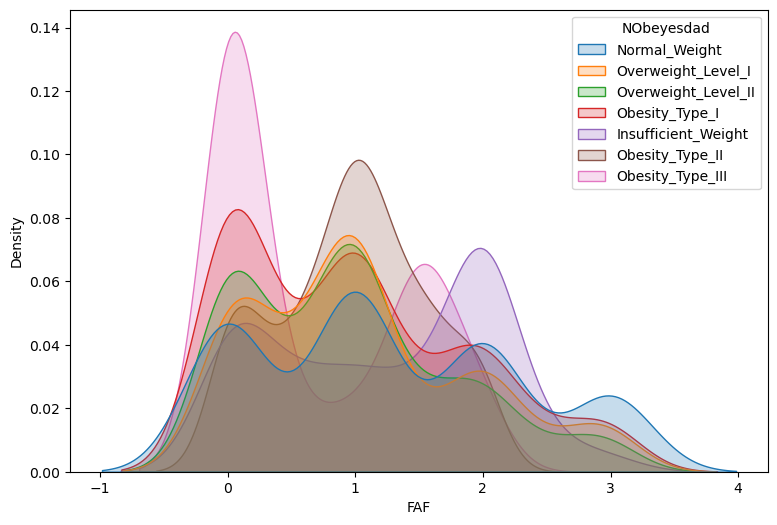

In [44]:
## FAF : How often do you have physical activity?

## Plot
figure, axes = plt.subplots(figsize=(9,6))
figure = sns.kdeplot(data=obesity_data, x="FAF", hue="NObeyesdad", fill= True)

plt.show()

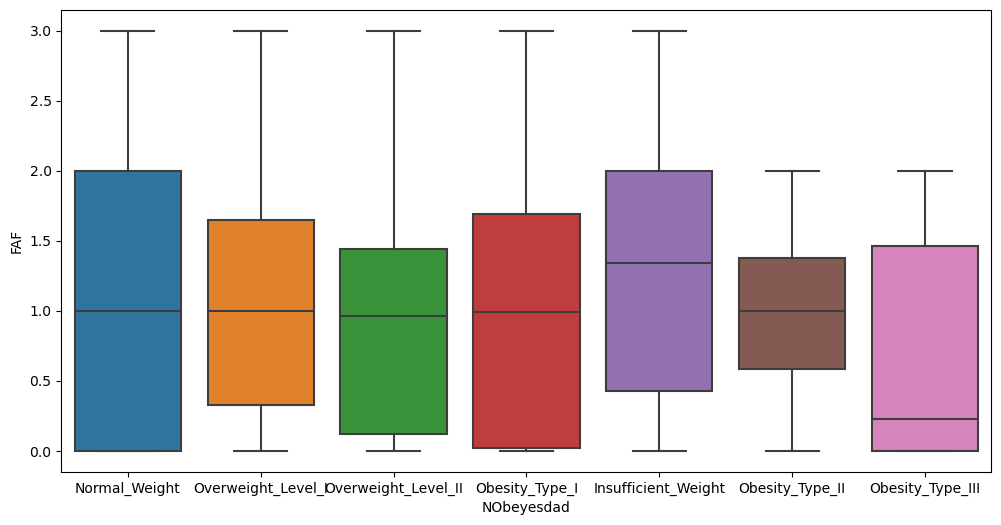

In [45]:
## FAF : How often do you have physical activity?

## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=obesity_data, x="NObeyesdad", y="FAF")

plt.show()

### TUE

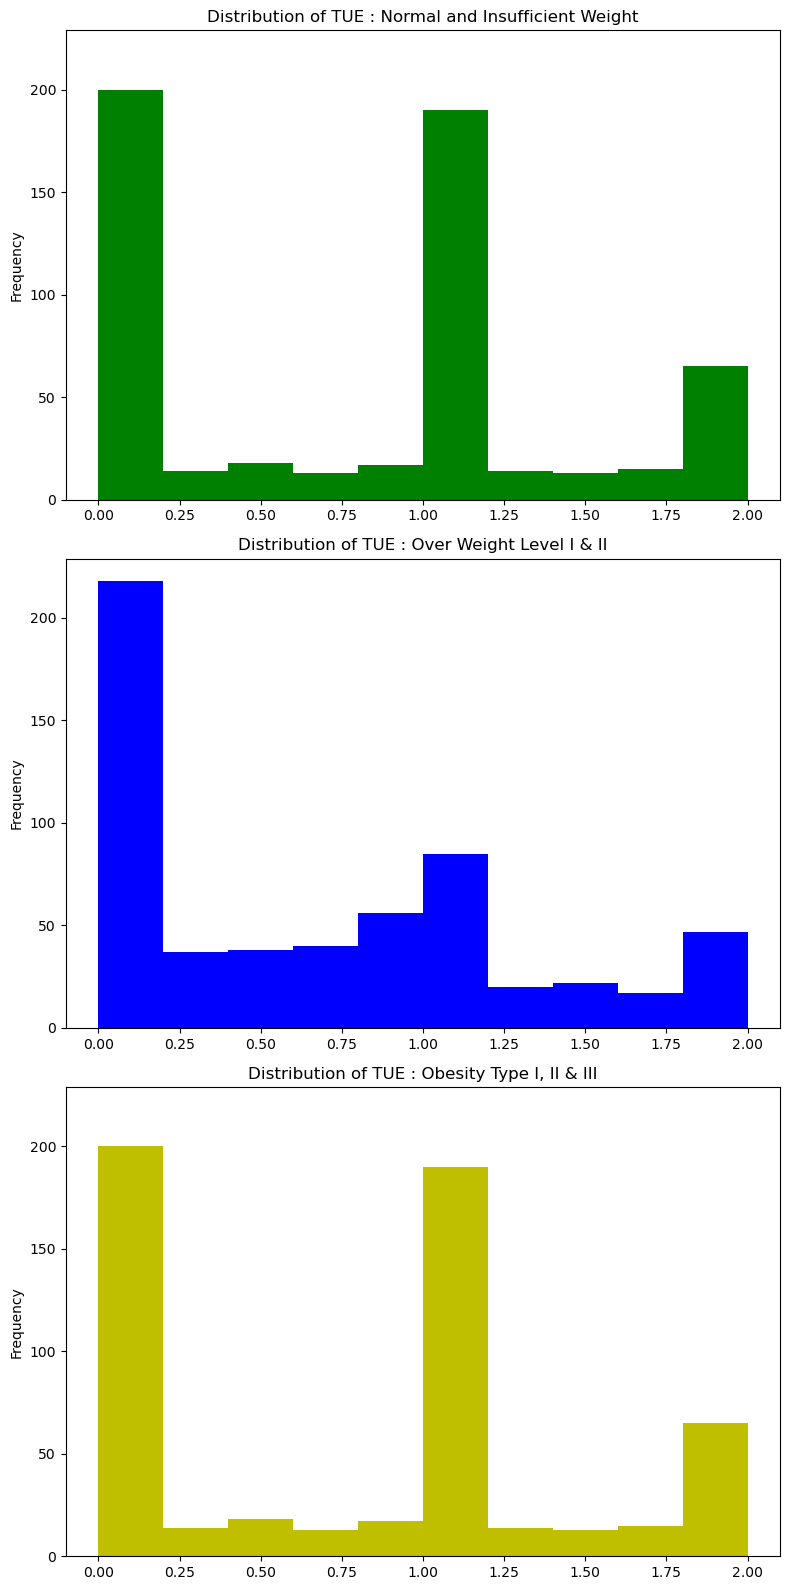

In [46]:
normalInsuff = (obesity_data[obesity_data["NObeyesdad"].isin(["Normal_Weight", "Insufficient_Weight"])])
obesityType = (obesity_data[obesity_data["NObeyesdad"].isin(["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])])
overWeightLevel = (obesity_data[obesity_data["NObeyesdad"].isin(["Overweight_Level_I", "Overweight_Level_II"])])

## Plots
figure, axes = plt.subplots(figsize=(8,16),nrows = 3 , ncols = 1, sharey=True)

normalInsuff["TUE"].plot.hist(color="g", bins=10, ax=axes[0])
axes[0].set_title('Distribution of TUE : Normal and Insufficient Weight')

overWeightLevel["TUE"].plot.hist(color="b", bins=10, ax=axes[1])
axes[1].set_title('Distribution of TUE : Over Weight Level I & II')

normalInsuff["TUE"].plot.hist(color="y", bins=10, ax=axes[2])
axes[2].set_title('Distribution of TUE : Obesity Type I, II & III')


plt.tight_layout()
plt.show()

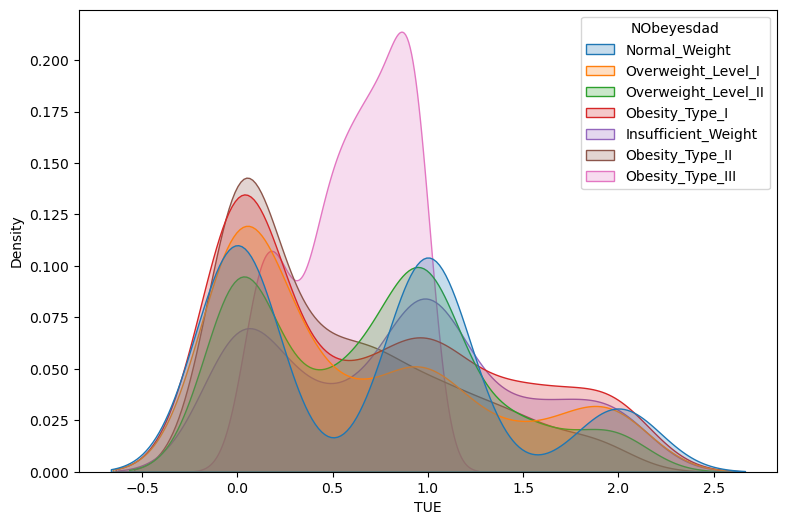

In [47]:
## TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?

## Plot
figure, axes = plt.subplots(figsize=(9,6))
figure = sns.kdeplot(data=obesity_data, x="TUE", hue="NObeyesdad", fill= True)

plt.show()

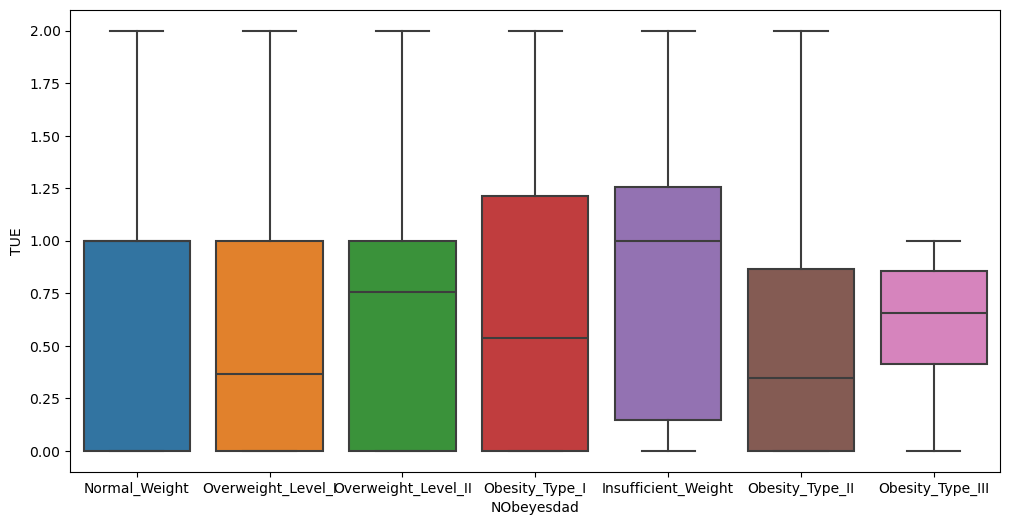

In [48]:
## TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?

## Plot
figure, axes = plt.subplots(figsize=(12,6))
figure = sns.boxplot(data=obesity_data, x="NObeyesdad", y="TUE")

plt.show()

In [49]:
# Get list of categorical variables
categoricalVariables = (obesity_data.dtypes == 'object')
object_cols = list(categoricalVariables[categoricalVariables].index)

print("Categorical variables:")
object_cols


Categorical variables:


['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

In [50]:
# Make copy to avoid changing original data 
X_ordinalEncoding = obesity_data.copy()

#object_cols = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()

X_ordinalEncoding[object_cols] = ordinal_encoder.fit_transform(obesity_data[object_cols])


pd.DataFrame(X_ordinalEncoding).head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0.0,1.62,64.0,3.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,3.0,1.0
1,21.0,0.0,1.52,56.0,2.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,1.0
2,23.0,1.0,1.80,77.0,1.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,3.0,1.0
3,27.0,1.0,1.80,87.0,1.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,4.0,5.0
4,22.0,1.0,1.78,89.8,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,6.0


## The correlation among features

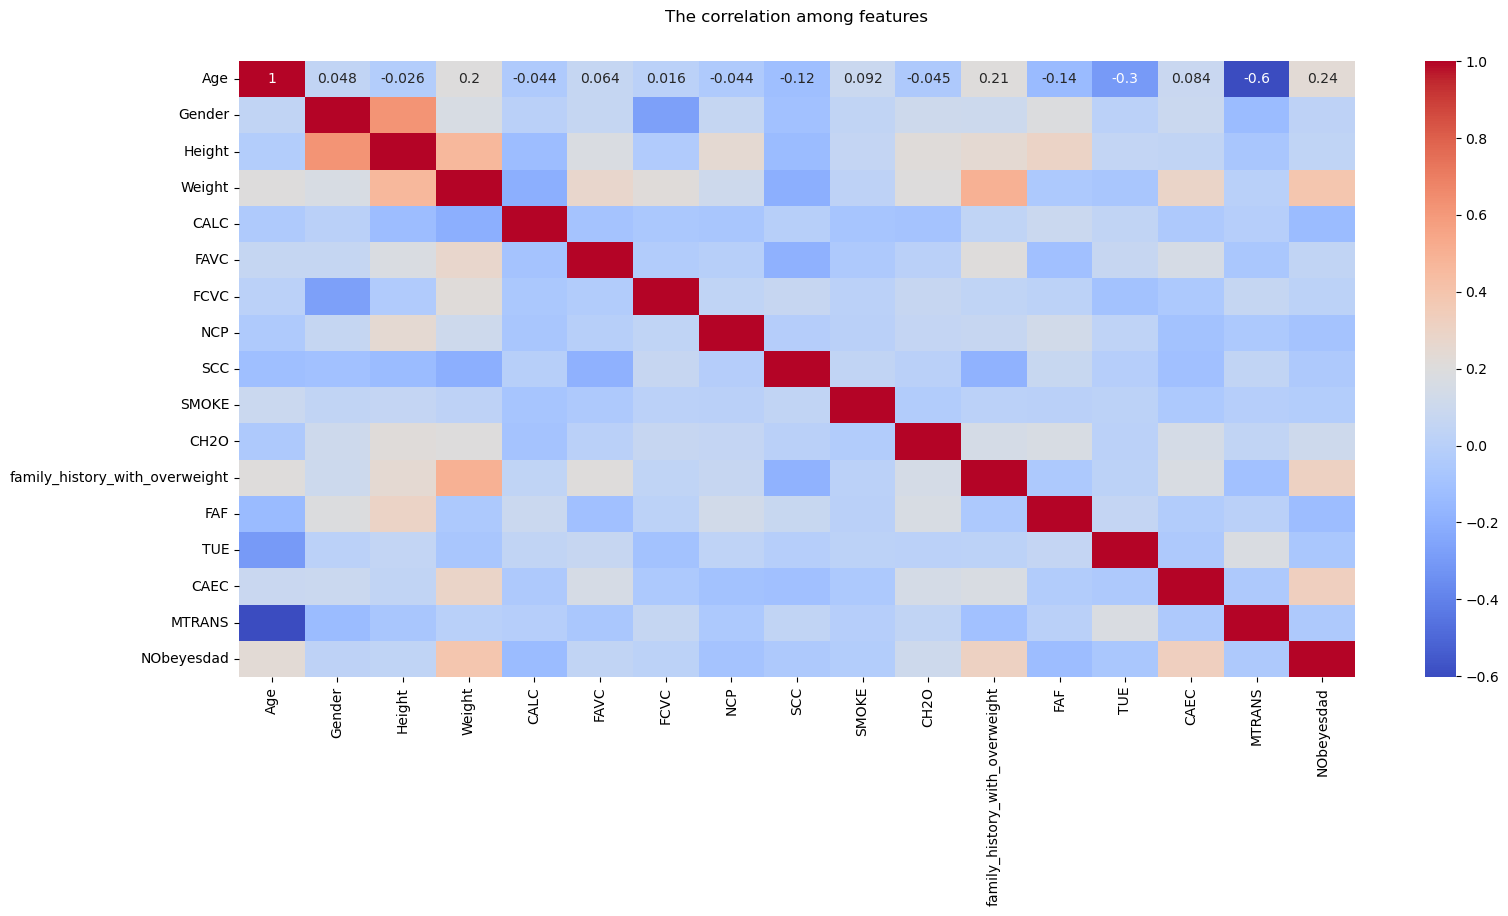

In [51]:

plt.figure(figsize=(18,8))

sns.heatmap(X_ordinalEncoding.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

# IV. Data Modeling

## Data Preparation

In [52]:
X = X_ordinalEncoding.drop(columns = ['NObeyesdad'])
y = X_ordinalEncoding.NObeyesdad
y = y.astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
412,33.000000,1.0,1.850000,85.000000,2.0,1.0,2.000000,3.000000,0.0,0.0,2.000000,0.0,1.000000,0.000000,1.0,0.0
651,21.529439,0.0,1.592379,44.009450,3.0,0.0,3.000000,1.612747,0.0,0.0,2.566629,0.0,1.190465,0.000000,1.0,3.0
1460,23.000000,1.0,1.742500,105.028665,2.0,1.0,2.393837,3.000000,0.0,0.0,2.014990,1.0,0.978815,0.413220,2.0,3.0
1419,31.783524,1.0,1.672959,90.000000,2.0,1.0,2.949242,1.782109,0.0,0.0,2.210997,1.0,1.992719,0.000000,2.0,0.0
1433,22.307413,0.0,1.605495,82.528575,3.0,1.0,2.049112,2.622055,0.0,0.0,2.280555,1.0,2.052896,0.896185,2.0,3.0


## Models

### 1. Logistic Regression

In [53]:
model = LogisticRegression(random_state=0, max_iter = 100)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

output = pd.DataFrame({'Candidats': X_test.index, 'ObesityLevel': predictions})


accuracy = accuracy_score(y_test, predictions)
print("Accuracy score of Logistic Regression model : ", accuracy)
output

Accuracy score of Logistic Regression model :  0.6356466876971609


,Candidats,ObesityLevel
0,1730,3
1,259,4
2,966,2
3,1911,4
4,1815,4
...,...,...
629,1592,2
630,731,5
631,1700,3
632,1442,2


In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        90
           1       0.56      0.52      0.54        87
           2       0.48      0.53      0.51       103
           3       0.83      0.64      0.73        90
           4       0.87      1.00      0.93       101
           5       0.53      0.47      0.50        81
           6       0.36      0.39      0.37        82

    accuracy                           0.64       634
   macro avg       0.63      0.63      0.63       634
weighted avg       0.64      0.64      0.63       634



### 2. Random Forest

In [55]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

output = pd.DataFrame({'Candidats': X_test.index, 'ObesityLevel': predictions})


accuracy = accuracy_score(y_test, predictions)
print("Accuracy score of Random Forest model : ", accuracy)
output

Accuracy score of Random Forest model :  0.8832807570977917


,Candidats,ObesityLevel
0,1730,3
1,259,1
2,966,5
3,1911,4
4,1815,4
...,...,...
629,1592,3
630,731,0
631,1700,3
632,1442,6


In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        90
           1       0.71      0.87      0.78        87
           2       0.85      0.91      0.88       103
           3       0.97      0.97      0.97        90
           4       1.00      1.00      1.00       101
           5       0.91      0.73      0.81        81
           6       0.85      0.73      0.78        82

    accuracy                           0.88       634
   macro avg       0.89      0.88      0.88       634
weighted avg       0.89      0.88      0.88       634



### 3. K Nearest Neighbors

In [57]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

output = pd.DataFrame({'Candidats': X_test.index, 'ObesityLevel': predictions})


accuracy = accuracy_score(y_test, predictions)
print("Accuracy score of K Nearest Neighbors model : ", accuracy)
output

Accuracy score of K Nearest Neighbors model :  0.8675078864353313


,Candidats,ObesityLevel
0,1730,3
1,259,2
2,966,5
3,1911,4
4,1815,4
...,...,...
629,1592,3
630,731,0
631,1700,3
632,1442,2


In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87        90
           1       0.81      0.51      0.62        87
           2       0.87      0.95      0.91       103
           3       0.96      0.97      0.96        90
           4       0.97      0.97      0.97       101
           5       0.79      0.80      0.80        81
           6       0.87      0.84      0.86        82

    accuracy                           0.87       634
   macro avg       0.87      0.86      0.86       634
weighted avg       0.87      0.87      0.86       634



### 4. Support Vector Machine Classifier

In [59]:
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

output = pd.DataFrame({'Candidats': X_test.index, 'ObesityLevel': predictions})


accuracy = accuracy_score(y_test, predictions)
print("Accuracy score of Support Vector Machine model : ", accuracy)
output

Accuracy score of Support Vector Machine model :  0.886435331230284


,Candidats,ObesityLevel
0,1730,3
1,259,2
2,966,5
3,1911,4
4,1815,4
...,...,...
629,1592,3
630,731,0
631,1700,3
632,1442,2


In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        90
           1       0.68      0.82      0.74        87
           2       0.94      0.92      0.93       103
           3       0.99      0.99      0.99        90
           4       1.00      0.99      1.00       101
           5       0.80      0.74      0.77        81
           6       0.83      0.77      0.80        82

    accuracy                           0.89       634
   macro avg       0.89      0.88      0.88       634
weighted avg       0.89      0.89      0.89       634



#### We note that Random Forest and Support Vector Machine perform best with accuracy score 0.88328 and 0.88644, respectively.